In [1]:
import sys
sys.path.append("..")
from IPython.display import display

In [2]:
import numpy as np
import logging
import pickle
import time
import importlib 
import copy

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from matplotlib import ticker
from matplotlib import colors
from matplotlib.patches import Ellipse
from matplotlib import gridspec



In [4]:
from scripts import reclusterTree
from scripts import linkageList
from scripts import heatClustermap
from scripts import Tree1D
from scripts import likelihood
# from scripts import beamsearchTJS
from scripts import N2Greedy
from scripts import beamSearch as bs
from scripts import beamSearchOptimal as BSO
from scripts import jetClustering
from scripts.utils import get_logger
from scripts import auxFunctions

In [5]:
logger = get_logger(level=logging.INFO)

In [490]:
"""Reload filles after changes"""
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
importlib.reload(Tree1D)
importlib.reload(likelihood)
importlib.reload(N2Greedy)
importlib.reload(bs)
importlib.reload(BSO)
importlib.reload(jetClustering)
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

# CLUSTERING ALGORITHMS TESTED ON JETS GENERATED WITH THE TOY GENERATIVE MODEL 

## ANALYSIS

Load truth and reclustered jets 

In [14]:
Nstart = 0
Nend = 500
N_jets = 100

In [15]:
truthDict  = jetClustering.appendTruthJets(Nstart,Nend,N_jets)

2019-10-11 18:53:29,785:INFO:: TOTAL TIME = 14.949465036392212


In [16]:
GreedyDict = jetClustering.appendGreedyJets(Nstart,Nend,N_jets)

2019-10-11 18:54:53,944:INFO:: TOTAL TIME = 83.51709413528442


In [17]:
BSODict = jetClustering.appendBSO_Scan(Nstart,Nend,N_jets)

2019-10-11 18:56:09,066:INFO:: TOTAL TIME = 75.11606693267822


In [18]:
len(BSODict["avgLogLH"])

25

In [ ]:
# dicsDir = "/scratch/sm4511/TreeAlgorithms/data/jetDict/"
# saveDics=False
# if saveDics:
#     with open(dicsDir + "truthDict"+str(N_jets) + "Mw.pkl", "wb") as f:
#         pickle.dump(truthDict, f)
        
#     with open(dicsDir + "GreedyDict"+str(N_jets) + "Mw.pkl", "wb") as f:
#         pickle.dump(GreedyDict, f)
        
#     with open(dicsDir + "BSODict"+str(N_jets) + "Mw.pkl", "wb") as f:
#         pickle.dump(BSODict, f)
    

In [ ]:
# with open(dicsDir + "jetDicts"+str(N_jets) + "Mw.pkl", "rb") as fd:
#     truthDict, GreedyDict,BSODict = pickle.load(fd, encoding='latin-1')

In [491]:
computeDijAngles = False
if computeDijAngles:
    truthDict = auxFunctions.scanJets(truthDict, dijmetrics=False,  angles=True)
    GreedyDict = auxFunctions.scanJets(GreedyDict, dijmetrics=False,  angles=True)
    BSODict = auxFunctions.scanJets(BSODict, dijmetrics=False,  angles=True)

KeyboardInterrupt: 

Log LH values before cut on Delta root 

In [19]:
print(" Truth mean logLH =  %0.1f $\pm$ %0.1f" %(np.average(truthDict["avgLogLH"]),  truthDict["sigma"]))
print(" Greedy mean logLH = %0.1f $\pm$ %0.1f" %(np.average(GreedyDict["avgLogLH"]),  GreedyDict["sigma"]))
print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f" %(np.average(BSODict["avgLogLH"]),  BSODict["sigma"]))

 Truth mean logLH =  -85.4 $\pm$ 1.1
 Greedy mean logLH = -127.9 $\pm$ 1.7
 Beam Search mean logLH = -95.5 $\pm$ 1.3


### PLOTS

In [20]:
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [21]:
Width = 10

In [22]:
# Njets = 100
# i=46
# inDir = "/scratch/sm4511/TreeAlgorithms/data/"
# # with open(inDir+"GreedyJets/Greedy_" + str(Njets) + "Mw_" + str(i) + ".pkl", "rb") as fd:
# #     jetsList, _ = pickle.load(fd, encoding='latin-1')
# with open(inDir+"BeamSearchJets/BSO_" + str(Njets) + "Mw_" + str(i) + ".pkl", "rb") as fd:
#     jetsList, _ = pickle.load(fd, encoding='latin-1')

In [23]:
truth_dic, Greedy_dic, BSO_dic = auxFunctions.deltaRootCut(Nstart,Nend, truthDict, GreedyDict, BSODict, Width = Width )

In [24]:
len(BSODict["jetsList"])

500

In [25]:
len(truthDict["jetsList"])

500

In [26]:
truth_dic =auxFunctions.jetsLogLH(Nstart,Nend, truth_dic)
Greedy_dic =auxFunctions.jetsLogLH(Nstart,Nend, Greedy_dic)
BSO_dic =auxFunctions.jetsLogLH(Nstart,Nend, BSO_dic)

In [27]:
# BSO_dic["jetsList"][0]

In [28]:
print(" Truth mean logLH =  %0.1f $\pm$ %0.1f" %(np.average(truth_dic["avgLogLH"]),  truth_dic["sigma"]))
print(" Greedy mean logLH = %0.1f $\pm$ %0.1f" %(np.average(Greedy_dic["avgLogLH"]),  Greedy_dic["sigma"]))
print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f" %(np.average(BSO_dic["avgLogLH"]),  BSO_dic["sigma"]))

 Truth mean logLH =  -40.6 $\pm$ 2.6
 Greedy mean logLH = -49.6 $\pm$ 4.3
 Beam Search mean logLH = -41.2 $\pm$ 2.8


In [29]:
# print(" Truth mean logLH =  %0.1f $\pm$ %0.1f +- %0.1f" 
#       %(np.average(truth_dic["avgLogLH"]),  truth_dic["sigma"],  truth_dic["statSigma"]))
# print(" Greedy mean logLH = %0.1f $\pm$ %0.1f +- %0.1f" 
#       %(np.average(Greedy_dic["avgLogLH"]),  Greedy_dic["sigma"],  Greedy_dic["statSigma"]))
# print(" Beam Search mean logLH = %0.1f $\pm$ %0.1f +- %0.1f" 
#       %(np.average(BSO_dic["avgLogLH"]),  BSO_dic["sigma"],  BSO_dic["statSigma"]))

#### LOG LIKELIHOOD

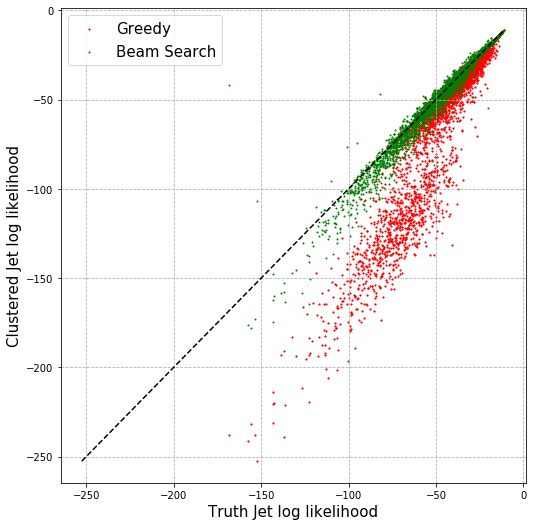

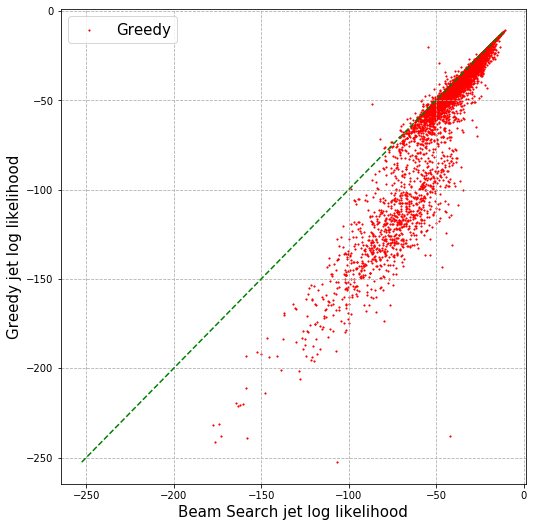

In [30]:
auxFunctions.LogLHscatterPlot(truth_dic, Greedy_dic, BSO_dic)
auxFunctions.LogLHscatterPlot(truth_dic, Greedy_dic, BSO_dic, truth=False)

### Delta root

In [31]:
truth_dic = auxFunctions.deltaRoot(truth_dic)

In [32]:
Greedy_dic = auxFunctions.deltaRoot(Greedy_dic)

In [33]:
BSO_dic = auxFunctions.deltaRoot(BSO_dic)

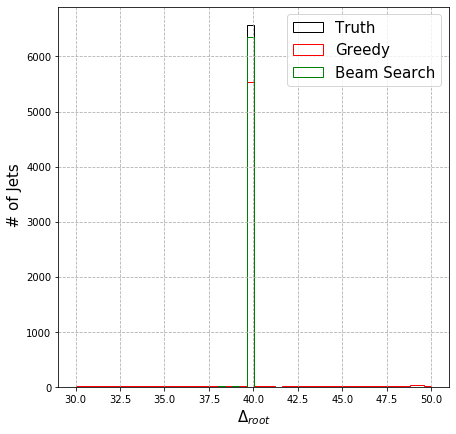

In [34]:
auxFunctions.variableHist(truth_dic, 
    variable1 =  truth_dic["deltaRoot"], 
    variable2 = Greedy_dic["deltaRoot"], 
    variable3 = BSO_dic["deltaRoot"],
             name = "$\Delta_{root}$")

### Momentum of the 2 subjets

In [35]:
truth_dic = auxFunctions.subjetPt(truth_dic)

In [36]:
Greedy_dic = auxFunctions.subjetPt(Greedy_dic)

In [37]:
BSO_dic = auxFunctions.subjetPt(BSO_dic)

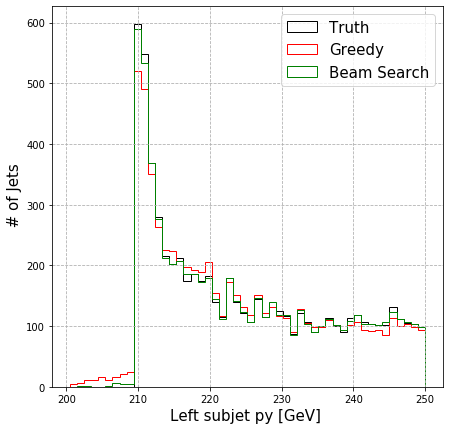

In [38]:
auxFunctions.variableHist( truth_dic, 
    variable1 =  truth_dic["SubjetPyMin"], 
    variable2 = Greedy_dic["SubjetPyMin"], 
    variable3 = BSO_dic["SubjetPyMin"],
             name = "Left subjet py [GeV]")

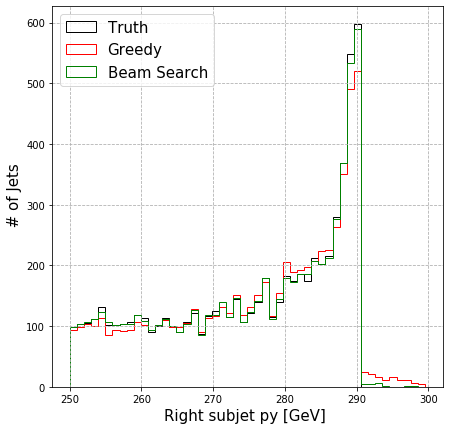

In [39]:
auxFunctions.variableHist(    truth_dic, 
    variable1 =  truth_dic["SubjetPyMax"], 
    variable2 = Greedy_dic["SubjetPyMax"], 
    variable3 = BSO_dic["SubjetPyMax"],
             name = "Right subjet py [GeV]",
                         labelLoc = "upper left")

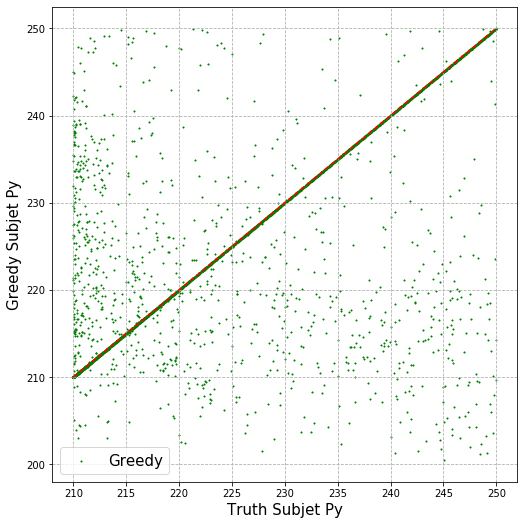

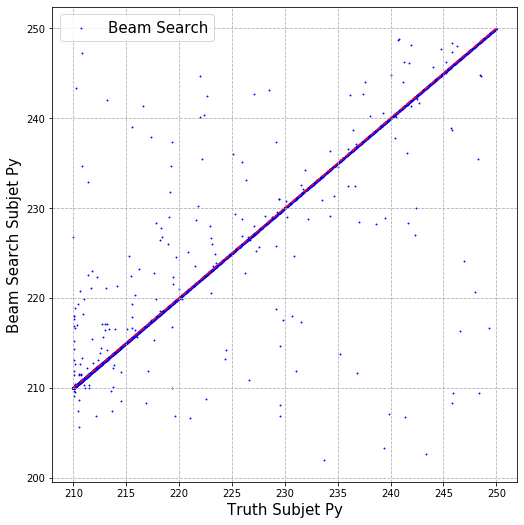

In [40]:
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic,  dicString = "SubjetPyMin", Greedy=True)
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic, dicString = "SubjetPyMin",  BS=True)


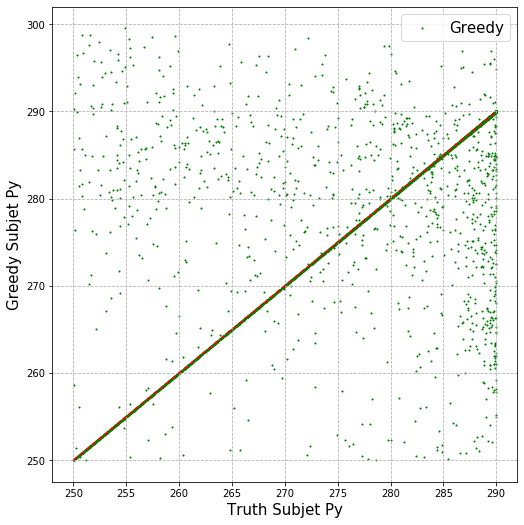

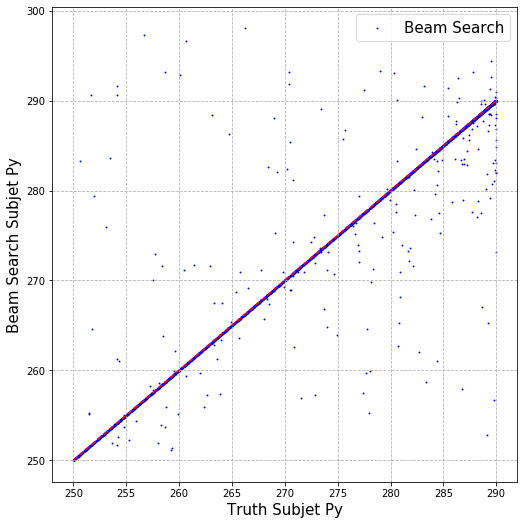

In [41]:
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic,  dicString = "SubjetPyMax", Greedy=True)
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic, dicString = "SubjetPyMax",  BS=True)

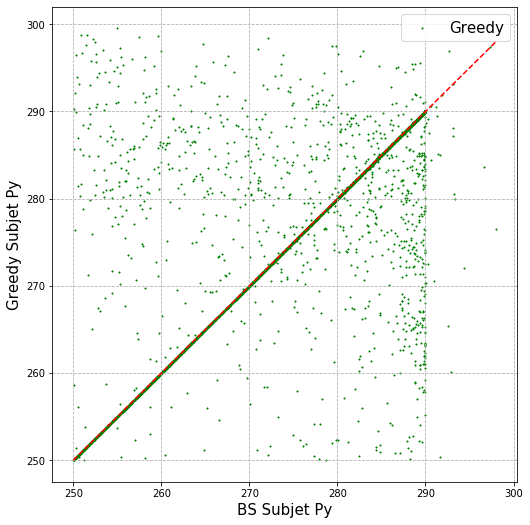

In [42]:
auxFunctions.PtscatterPlot(truth_dic, Greedy_dic, BSO_dic, dicString = "SubjetPyMax")

### Phi angle for the (y,z) plane. Constituents angle, delta_root angle and delta_parent angle for all parents

In [593]:
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [594]:
truth_dic = auxFunctions.subjetPhi(truth_dic)

In [595]:
Greedy_dic = auxFunctions.subjetPhi(Greedy_dic)

In [596]:
BSO_dic = auxFunctions.subjetPhi(BSO_dic)

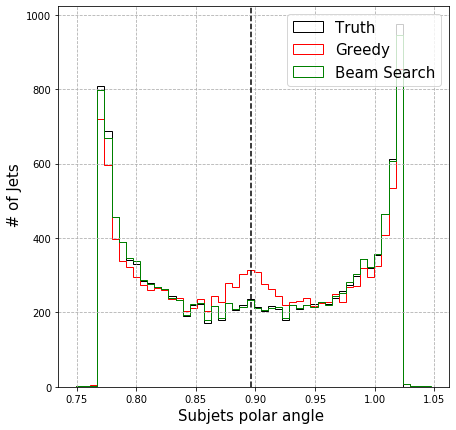

In [47]:
auxFunctions.variableHist(
    truth_dic, 
    variable1 =  truth_dic["SubjetPhi"], 
    variable2 = Greedy_dic["SubjetPhi"], 
    variable3 = BSO_dic["SubjetPhi"],
             bins=50,
             name = "Subjets polar angle",
             fixedJetP = True)

In [511]:
truth_dic = auxFunctions.scanAngles(truth_dic)

In [512]:
Greedy_dic = auxFunctions.scanAngles(Greedy_dic)

In [513]:
BSO_dic = auxFunctions.scanAngles(BSO_dic)

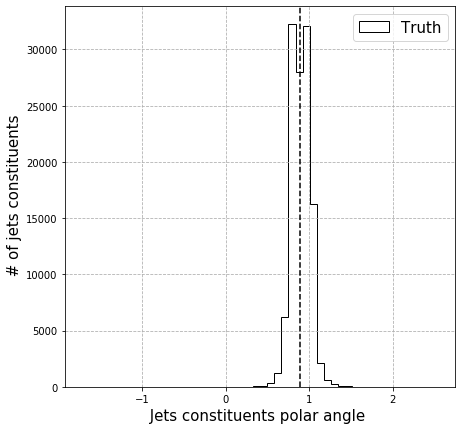

In [51]:
""" Subjets constituents angle. The origin is in the beam axiz (z direction)"""
auxFunctions.ConstPhiHist(truth_dic, fixedJetP = True)

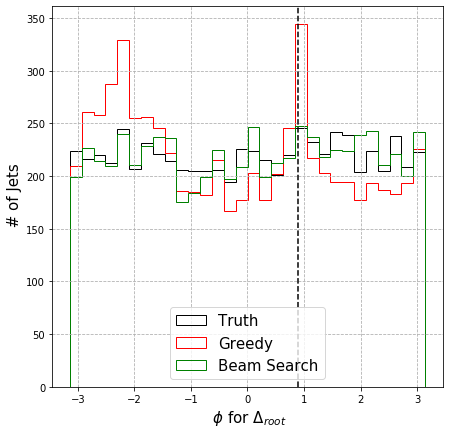

In [52]:
auxFunctions.variableHist(
    truth_dic, 
    variable1 =  truth_dic["SubjetPhiDelta"], 
    variable2 = Greedy_dic["SubjetPhiDelta"], 
    variable3 = BSO_dic["SubjetPhiDelta"],
             bins=30,
             name = " $\phi$ for $\Delta_{root}$",
             fixedJetP = True,
labelLoc = "lower center")

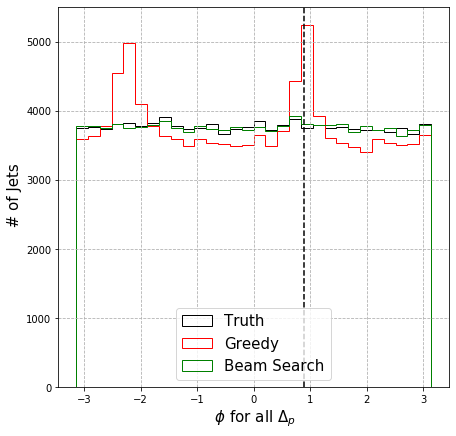

In [514]:
auxFunctions.variableHist(
    truth_dic, 
    variable1 =  truth_dic["JetsPhiDelta"], 
    variable2 = Greedy_dic["JetsPhiDelta"], 
    variable3 = BSO_dic["JetsPhiDelta"],
             bins=30,
             name = " $\phi$ for all $\Delta_p$",
             fixedJetP = True,
labelLoc = "lower center")

In [54]:
Nconst = [len(jet["leaves"]) for jet in truth_dic["jetsList"]]

In [55]:
""" Find jet location in list for a specific number of leaves"""
for i,N in enumerate(Nconst):
    if N>110:
        print("Jet #",i,"N const = ",N )

In [56]:
# k=1263
# auxFunctions.variableHist(
#     truth_dic, 
#     variable1 =  truth_dic["jetsList"][k]["PhiDelta"], 
#     variable2 = Greedy_dic["jetsList"][k]["PhiDelta"], 
#     variable3 = BSO_dic["jetsList"][k]["PhiDelta"],
#              bins=10,
#              name = " Jets inner node Delta angle  ",
#             yaxisName = " # of jet inner nodes",
#              fixedJetP = True)


### $d_{ij}$ vs log Likelihood

In [605]:
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [606]:
 truth_dic = auxFunctions.scanJets(truth_dic, dijmetrics=False,  angles=True)

In [607]:
 Greedy_dic = auxFunctions.scanJets(Greedy_dic, dijmetrics=False,  angles=True)

In [608]:
 BSO_dic = auxFunctions.scanJets(BSO_dic, dijmetrics=False,  angles=True)

In [487]:
jetA = np.arctan2(500,400)

In [483]:
truthDict2["JetsPhiDeltaRel"][0:2]

[array([-1.5802267 , -2.8175943 ,  1.120909  , -0.6437583 , -0.24011809,
        -0.07845229, -2.8145242 , -0.9273059 ], dtype=float32),
 array([-3.566133  , -0.22830802, -1.3423043 , -2.5224516 ,  0.5675815 ,
        -1.1341505 , -2.4967332 , -2.9751966 , -2.2480853 , -2.5497122 ,
        -1.1538743 , -2.5155077 , -2.2834198 ,  1.6342704 , -3.8744338 ,
         0.13674575, -2.375374  ,  0.996996  ,  0.2373901 , -0.02826566,
        -0.82932687, -1.5651436 ,  1.428374  ], dtype=float32)]

In [488]:
truth_dic["JetsPhiDelta"][0:10]-jetA

array([-1.5802267 , -2.8175943 ,  1.120909  , -0.6437583 , -0.24011809,
       -0.07845229, -2.8145242 , -0.9273059 , -3.566133  , -0.22830802],
      dtype=float32)

In [496]:
truth_dic = auxFunctions.scanDij(truth_dic)

In [59]:
Greedy_dic = auxFunctions.scanDij(Greedy_dic)

In [60]:
BSO_dic = auxFunctions.scanDij(BSO_dic)

In [61]:
np.shape(Greedy_dic["dijs"])

(4, 113049)

In [62]:
np.shape(truth_dic["dijSubjets"])

(4, 6575)

In [63]:


# auxFunctions.dijLogLHscatter(
#     variable = truth_dic["dijSubjets"],
#     nameY = "Subjets $d_{ij}$",
#     nameX ="Subjet splitting log likelihood",
#     title = "Truth jets",
#     logLH =True)

# auxFunctions.dijLogLHscatter(
#     variable = truth_dic["dijs"],
#     nameX = "$d_{ij}$",
#     nameY ="Splitting log likelihood",
#     title = "Truth jets",
#     logLH = True)

In [519]:
len(truth_dic["dijs"][0])

113049

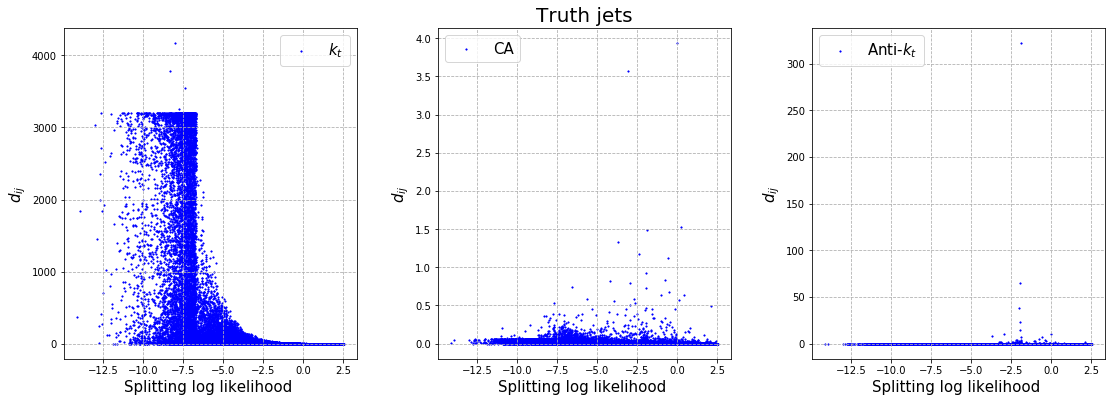

In [520]:
jetdijs = truth_dic["dijs"]
nameY = "$d_{ij}$"
nameX ="Splitting log likelihood"
title = "Truth jets"
# jetdijs2 = BSO_dic["dijs"]
# jetdijs3 = Greedy_dic["dijs"]
LabelJetdijs = "$k_t$"
LabelJetdijs2 = "CA"
LabelJetdijs3 = "Anti-$k_t$"


fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(15, 5)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1


ax1.scatter(jetdijs[0], jetdijs[3], color="blue", marker="X", s=markersize, label=LabelJetdijs)
ax2.scatter(jetdijs[0], jetdijs[2], color="blue", marker="X", s=markersize, label=LabelJetdijs2)
ax3.scatter(jetdijs[0], jetdijs[1], color="blue", marker="X", s=markersize, label=LabelJetdijs3)

ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"%s "%nameX, fontsize=15)
ax1.set_ylabel(r"%s "%nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"%s "%nameX, fontsize=15)
ax2.set_ylabel(r"%s "%nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"%s "%nameX, fontsize=15)
ax3.set_ylabel(r"%s "%nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')




# plt.legend(loc='best', fontsize=15)
# plt.grid(which='both', axis='both', linestyle='--')
ax2.set_title(r"%s"%title, fontsize=20)
plt.show()

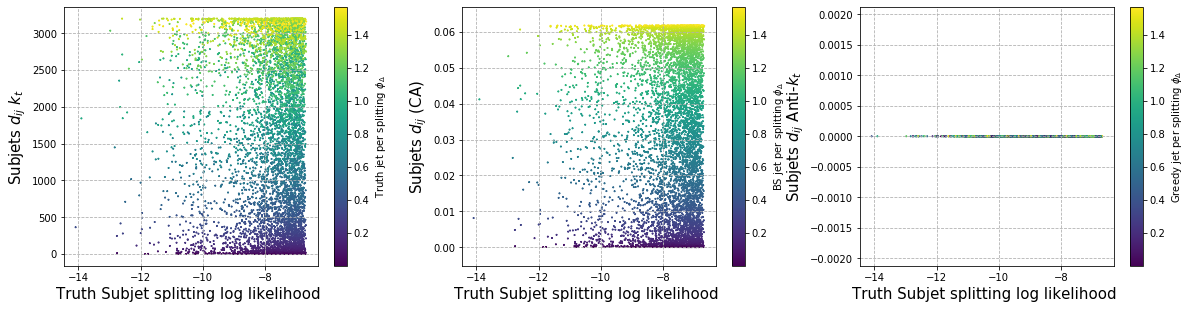

In [597]:
jetdijs = truth_dic["dijSubjets"]
nameY = "Subjets $d_{ij}$"
nameX ="Subjet splitting log likelihood"
title = "Truth jets"
# jetdijs2 = BSO_dic["dijs"]
# jetdijs3 = Greedy_dic["dijs"]
LabelJetdijs = "$k_t$"
LabelJetdijs2 = "CA"
LabelJetdijs3 = "Anti-$k_t$"


fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(16, 4)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1


cl1 = ax1.scatter(jetdijs[0], jetdijs[3], c = truth_dic["SubjetPhiDelta"], marker="X", s=markersize)
cl2 = ax2.scatter(jetdijs[0], jetdijs[2], c = truth_dic["SubjetPhiDelta"], marker="X", s=markersize)
cl3 = ax3.scatter(jetdijs[0], jetdijs[1], c = truth_dic["SubjetPhiDelta"], marker="X", s=markersize)

# ax1.scatter(jetdijs[0], jetdijs[3], color="blue", marker="X", s=markersize, label=LabelJetdijs)
# ax2.scatter(jetdijs[0], jetdijs[2], color="blue", marker="X", s=markersize, label=LabelJetdijs2)
# ax3.scatter(jetdijs[0], jetdijs[1], color="blue", marker="X", s=markersize, label=LabelJetdijs3)

fig2.colorbar(cl1, ax=ax1, label="Truth jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl2, ax=ax2, label="BS jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl3, ax=ax3, label="Greedy jet per splitting $\phi_{\Delta}$")

# ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"Truth %s "%nameX, fontsize=15)
ax1.set_ylabel(r"%s $k_t$"%nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

# ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"Truth %s "%nameX, fontsize=15)
ax2.set_ylabel(r"%s (CA)"%nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

# ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"Truth %s "%nameX, fontsize=15)
ax3.set_ylabel(r"%s Anti-$k_t$"%nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')



# plt.legend(loc='best', fontsize=15)
# plt.grid(which='both', axis='both', linestyle='--')
# ax2.set_title(r"%s"%title, fontsize=20)
plt.show()

We show the subjets splitting log lilkelihood vs the distance $d_{ij}$. The colormap indicates the angle $\phi_{\Delta}$ of the root node splitting scale vector $\Delta$ with respect to the root node momentum. Given that the splitting rule gives $p_{L/R} =\frac{1}{2} p_P \pm \Delta$ and $d_{ij}$ depends on the opening angle between $p_{L}$ and $p_{R}$, we map $\phi_{\Delta}$ to the range $[0,\pi/2]$.  The log likelihood is independent of this angle as expected, and for a given log likelihood, greater $d_{ij}$ implies greater  $\phi_{\Delta}$ also as expected.

No handles with labels found to put in legend.


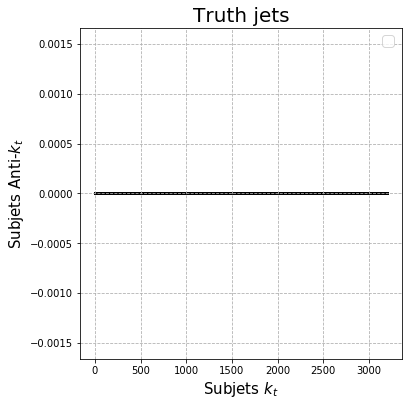

No handles with labels found to put in legend.


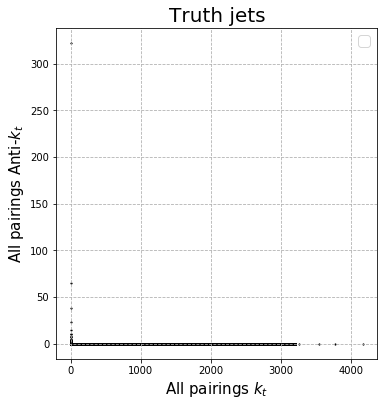

In [66]:
auxFunctions.dijLogLHscatter(
    variable = truth_dic["dijSubjets"],
    nameX = "Subjets $k_t$",
    nameY ="Subjets Anti-$k_t$",
    title = "Truth jets",
    dijOnly =True)

auxFunctions.dijLogLHscatter(
    variable = truth_dic["dijs"],
    nameX = "All pairings $k_t$",
    nameY ="All pairings Anti-$k_t$",
    title = "Truth jets",
    dijOnly = True)

In [67]:
# auxFunctions.dijLogLHscatter(
#     variable = truth_dic["dijs"],
#     nameY = "$k_t$",
#     nameX ="Splitting log likelihood",
#     title = "",
#     kt = True,
#     jetdijs2 = BSO_dic["dijs"],
#     jetdijs3 = Greedy_dic["dijs"],
#     LabelJetdijs = "Truth",
#     LabelJetdijs2 = "BS",
#     LabelJetdijs3 = "Greedy",
#                     )

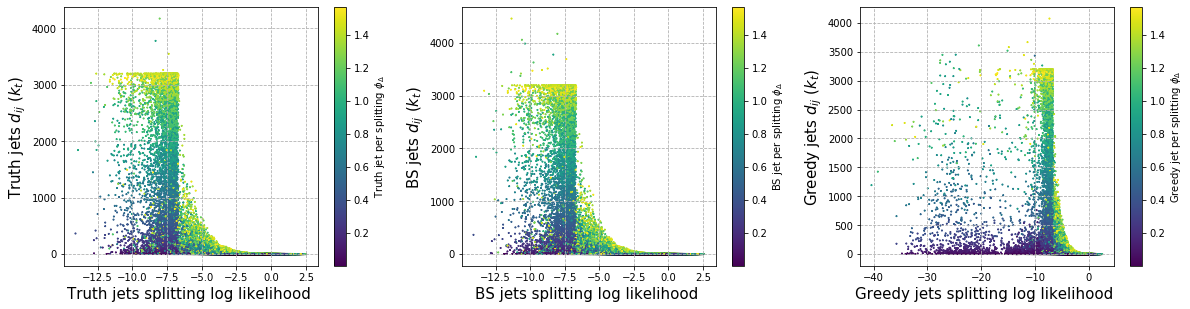

In [611]:
jetdijs = truth_dic["dijs"]
nameY = "$d_{ij}$ ($k_t$)"
nameX ="splitting log likelihood"
title = ""
jetdijs2 = BSO_dic["dijs"]
jetdijs3 = Greedy_dic["dijs"]
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(16, 4)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

cl1 = ax1.scatter(jetdijs[0], jetdijs[3], c=truth_dic["JetsPhiDeltaRel"], marker="X", s=markersize)
cl2 = ax2.scatter(jetdijs2[0], jetdijs2[3], c=BSO_dic["JetsPhiDeltaRel"],  marker="X", s=markersize)
cl3 = ax3.scatter(jetdijs3[0], jetdijs3[3], c=Greedy_dic["JetsPhiDeltaRel"],  marker="X", s=markersize)


fig2.colorbar(cl1, ax=ax1, label="Truth jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl2, ax=ax2, label="BS jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl3, ax=ax3, label="Greedy jet per splitting $\phi_{\Delta}$")


# ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"Truth jets %s "%nameX, fontsize=15)
ax1.set_ylabel(r"Truth jets %s "%nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

# ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"BS jets %s "%nameX, fontsize=15)
ax2.set_ylabel(r"BS jets %s "%nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

# ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"Greedy jets %s "%nameX, fontsize=15)
ax3.set_ylabel(r"Greedy jets %s "%nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')




# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s"%title, fontsize=20)
plt.show()

We show the jet splitting log lilkelihood vs the distance $d_{ij}$. The colormap indicates the angle $\phi_{\Delta}$ of the parent node splitting scale vector $\Delta$ with respect to the parent node momentum. Given that the splitting rule gives $p_{L/R} =\frac{1}{2} p_P \pm \Delta$ and $d_{ij}$ depends on the opening angle between $p_{L}$ and $p_{R}$, we map $\phi_{\Delta}$ to the range $[0,\pi/2]$.  The log likelihood looks to be independent of this angle as expected, and for a given log likelihood, greater $d_{ij}$ implies greater  $\phi_{\Delta}$ also as expected.

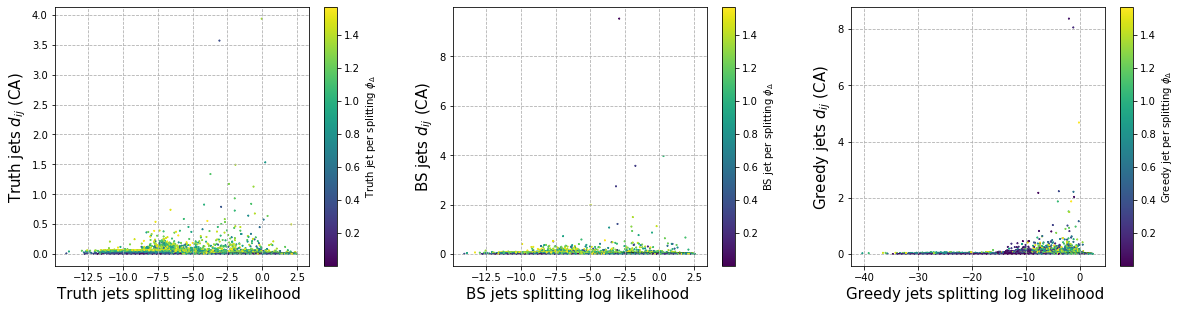

In [613]:
jetdijs = truth_dic["dijs"]
nameY = "$d_{ij}$ (CA)"
nameX ="splitting log likelihood"
title = ""
jetdijs2 = BSO_dic["dijs"]
jetdijs3 = Greedy_dic["dijs"]
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(16, 4)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

cl1 = ax1.scatter(jetdijs[0], jetdijs[2], c=truth_dic["JetsPhiDeltaRel"], marker="X", s=markersize)
cl2 = ax2.scatter(jetdijs2[0], jetdijs2[2], c=BSO_dic["JetsPhiDeltaRel"],  marker="X", s=markersize)
cl3 = ax3.scatter(jetdijs3[0], jetdijs3[2], c=Greedy_dic["JetsPhiDeltaRel"],  marker="X", s=markersize)


fig2.colorbar(cl1, ax=ax1, label="Truth jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl2, ax=ax2, label="BS jet per splitting $\phi_{\Delta}$")
fig2.colorbar(cl3, ax=ax3, label="Greedy jet per splitting $\phi_{\Delta}$")


# ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"Truth jets %s "%nameX, fontsize=15)
ax1.set_ylabel(r"Truth jets %s "%nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

# ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"BS jets %s "%nameX, fontsize=15)
ax2.set_ylabel(r"BS jets %s "%nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

# ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"Greedy jets %s "%nameX, fontsize=15)
ax3.set_ylabel(r"Greedy jets %s "%nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')




# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s"%title, fontsize=20)
plt.show()

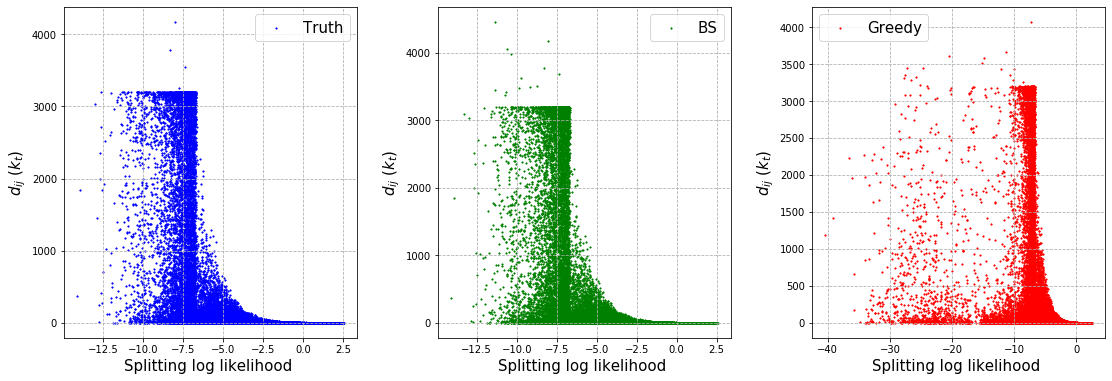

In [68]:
jetdijs = truth_dic["dijs"]
nameY = "$d_{ij}$ ($k_t$)"
nameX ="Splitting log likelihood"
title = ""
jetdijs2 = BSO_dic["dijs"]
jetdijs3 = Greedy_dic["dijs"]
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(15, 5)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

ax1.scatter(jetdijs[0], jetdijs[3], color="blue", marker="X", s=markersize, label=LabelJetdijs)
ax2.scatter(jetdijs2[0], jetdijs2[3], color="green", marker="X", s=markersize, label=LabelJetdijs2)
ax3.scatter(jetdijs3[0], jetdijs3[3], color="red", marker="X", s=markersize, label=LabelJetdijs3)

ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"%s "%nameX, fontsize=15)
ax1.set_ylabel(r"%s "%nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"%s "%nameX, fontsize=15)
ax2.set_ylabel(r"%s "%nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"%s "%nameX, fontsize=15)
ax3.set_ylabel(r"%s "%nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')




# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s"%title, fontsize=20)
plt.show()

In [69]:
# auxFunctions.dijLogLHscatter(
#     variable = truth_dic["dijs"],
#     nameY = "Anti-$k_t$",
#     nameX ="Splitting log likelihood",
#     title = "",
#     antikt = True,
#     jetdijs2 = BSO_dic["dijs"],
#     jetdijs3 = Greedy_dic["dijs"],
#     LabelJetdijs = "Truth",
#     LabelJetdijs2 = "BS",
#     LabelJetdijs3 = "Greedy",
#                     )

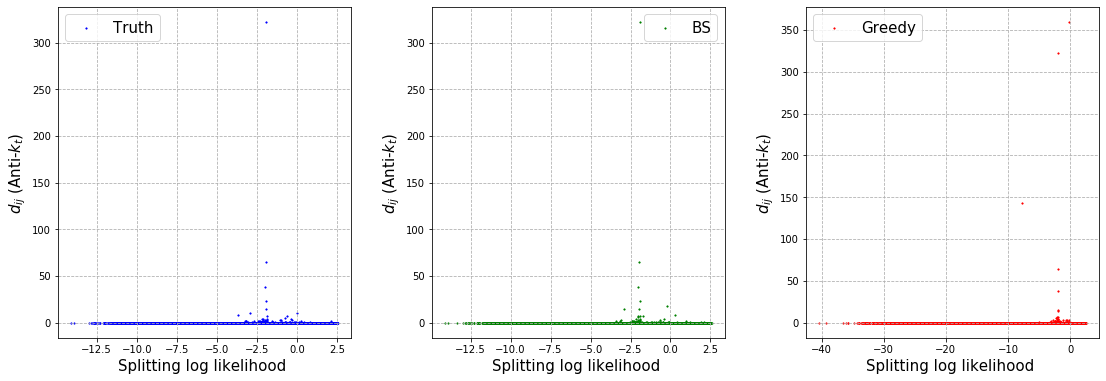

In [70]:
jetdijs = truth_dic["dijs"]
nameY = "$d_{ij}$ (Anti-$k_t$)"
nameX ="Splitting log likelihood"
title = ""
jetdijs2 = BSO_dic["dijs"]
jetdijs3 = Greedy_dic["dijs"]
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(15, 5)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

ax1.scatter(jetdijs[0], jetdijs[1], color="blue", marker="X", s=markersize, label=LabelJetdijs)
ax2.scatter(jetdijs2[0], jetdijs2[1], color="green", marker="X", s=markersize, label=LabelJetdijs2)
ax3.scatter(jetdijs3[0], jetdijs3[1], color="red", marker="X", s=markersize, label=LabelJetdijs3)

ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"%s "%nameX, fontsize=15)
ax1.set_ylabel(r"%s "%nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"%s "%nameX, fontsize=15)
ax2.set_ylabel(r"%s "%nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"%s "%nameX, fontsize=15)
ax3.set_ylabel(r"%s "%nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')




# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s"%title, fontsize=20)
plt.show()

### Tree Imbalance

In [430]:
importlib.reload(auxFunctions)

<module 'scripts.auxFunctions' from '/Users/sebastianmacaluso/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/auxFunctions.py'>

In [462]:
weight = 0

In [463]:
truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)

In [464]:
Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)

In [465]:
BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)

Subjets imbalance

In [471]:
# stepSize = 500
# print(" Truth mean  =  %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(truth_dic["subjetsImb"]),  auxFunctions.getStd(truth_dic["subjetsImb"],stepSize),auxFunctions.statSigma(truth_dic["subjetsImb"])))
# print(" Beam Search mean = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(BSO_dic["subjetsImb"]),  auxFunctions.getStd(BSO_dic["subjetsImb"],stepSize),auxFunctions.statSigma(truth_dic["subjetsImb"])))
# print(" Greedy mean  = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(Greedy_dic["subjetsImb"]),  auxFunctions.getStd(Greedy_dic["subjetsImb"],stepSize),auxFunctions.statSigma(truth_dic["subjetsImb"])))

In [474]:
stepSize = 500
print(" Truth mean subjets imbalance =  %0.4f $\pm$ %0.4f" %
      (np.average(truth_dic["subjetsImb"]),  auxFunctions.getStd(truth_dic["subjetsImb"],stepSize)))
print(" Beam Search mean subjets imbalance = %0.4f $\pm$ %0.4f" %
      (np.average(BSO_dic["subjetsImb"]),  auxFunctions.getStd(BSO_dic["subjetsImb"],stepSize)))
print(" Greedy mean subjets imbalance  = %0.4f $\pm$ %0.4f" %
      (np.average(Greedy_dic["subjetsImb"]),  auxFunctions.getStd(Greedy_dic["subjetsImb"],stepSize)))


 Truth mean subjets imbalance =  0.3215 $\pm$ 0.0072
 Beam Search mean subjets imbalance = 0.3219 $\pm$ 0.0074
 Greedy mean subjets imbalance  = 0.2991 $\pm$ 0.0085


Tree imbalance

In [470]:
# stepSize = 500
# print(" Truth mean  =  %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(truth_dic["treesImb"]),  auxFunctions.getStd(truth_dic["treesImb"],stepSize),auxFunctions.statSigma(truth_dic["treesImb"])))
# print(" Beam Search mean = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(BSO_dic["treesImb"]),  auxFunctions.getStd(BSO_dic["treesImb"],stepSize),auxFunctions.statSigma(truth_dic["treesImb"])))
# print(" Greedy mean  = %0.4f $\pm$ %0.4f $\pm$ %0.5f" %
#       (np.average(Greedy_dic["treesImb"]),  auxFunctions.getStd(Greedy_dic["treesImb"],stepSize),auxFunctions.statSigma(truth_dic["treesImb"])))

In [475]:
stepSize = 500
print(" Truth mean tree imbalance =  %0.4f $\pm$ %0.4f" %
      (np.average(truth_dic["treesImb"]),  auxFunctions.getStd(truth_dic["treesImb"],stepSize)))
print(" Beam Search mean tree imbalance = %0.4f $\pm$ %0.4f" %
      (np.average(BSO_dic["treesImb"]),  auxFunctions.getStd(BSO_dic["treesImb"],stepSize)))
print(" Greedy mean tree imbalance = %0.4f $\pm$ %0.4f" %
      (np.average(Greedy_dic["treesImb"]),  auxFunctions.getStd(Greedy_dic["treesImb"],stepSize)))


 Truth mean tree imbalance =  0.1898 $\pm$ 0.0021
 Beam Search mean tree imbalance = 0.1885 $\pm$ 0.0020
 Greedy mean tree imbalance = 0.1922 $\pm$ 0.0021


In [239]:
auxFunctions.subjetConst(testJet , testJet["root_id"])

0.7192982456140351

In [240]:
auxFunctions.treeBalance(testJet , testJet["root_id"],0)

0.7458925412625452

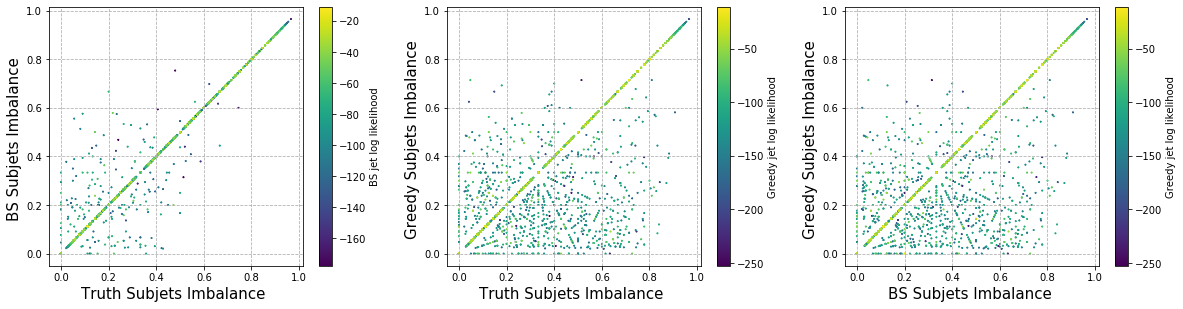

In [567]:
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)
# Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)
# BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)

nameY = "Subjets Imbalance"
nameX ="Subjets Imbalance"
title = ""
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(16, 4)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1


# cl1 = ax2.scatter(truth_dic["subjetsImb"], BSO_dic["subjetsImb"], c=BSO_dic["jetsListLogLH"],  marker="X", s=markersize, label=LabelJetdijs2)

# cl2 = ax1.scatter(truth_dic["subjetsImb"], Greedy_dic["subjetsImb"],  c=Greedy_dic["jetsListLogLH"],  marker="X", s=markersize, label=LabelJetdijs3)

# cl3 = ax3.scatter(BSO_dic["subjetsImb"], Greedy_dic["subjetsImb"],  c=Greedy_dic["jetsListLogLH"], marker="X", s=markersize, label=LabelJetdijs3)

cl1 = ax1.scatter(truth_dic["subjetsImb"], BSO_dic["subjetsImb"], c=BSO_dic["jetsListLogLH"],  marker="X", s=markersize)

cl2 = ax2.scatter(truth_dic["subjetsImb"], Greedy_dic["subjetsImb"],  c=Greedy_dic["jetsListLogLH"],  marker="X", s=markersize)

cl3 = ax3.scatter(BSO_dic["subjetsImb"], Greedy_dic["subjetsImb"],  c=Greedy_dic["jetsListLogLH"], marker="X", s=markersize)

fig2.colorbar(cl1, ax=ax1, label="BS jet log likelihood")
fig2.colorbar(cl2, ax=ax2, label="Greedy jet log likelihood")
fig2.colorbar(cl3, ax=ax3, label="Greedy jet log likelihood")

#     ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"Truth %s "%nameX, fontsize=15)
ax1.set_ylabel(r"BS %s "%nameX, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

#     ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"Truth %s "%nameX, fontsize=15)
ax2.set_ylabel(r"Greedy %s "%nameX, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

#     ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"BS %s "%nameX, fontsize=15)
ax3.set_ylabel(r"Greedy %s "%nameX, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')



# plt.colorbar(ax=ax2)
# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s"%title, fontsize=20)
plt.show()

We show the subjets imbalance defined as Imb $= abs(N_L - N_R)/(N_L + N_R)$, with $N_{L/R}$ the number of constituents in each branch. The colormap shows the jet log likeihood.
Also, BS jets approximate the truth jets better than the Greedy ones.

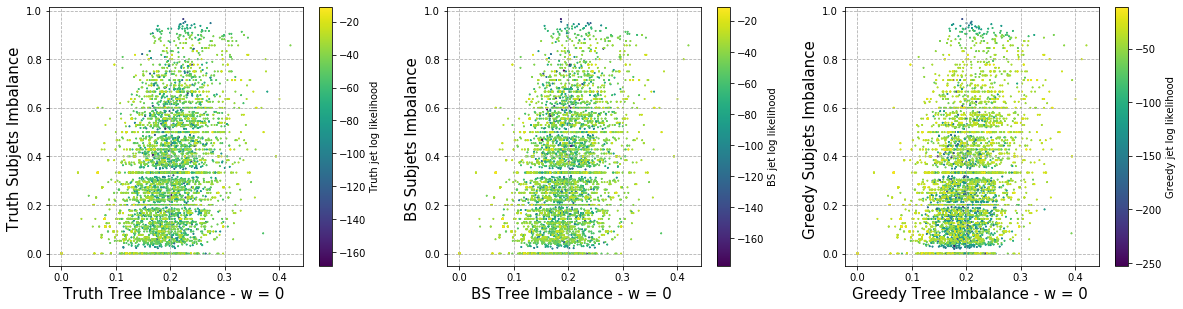

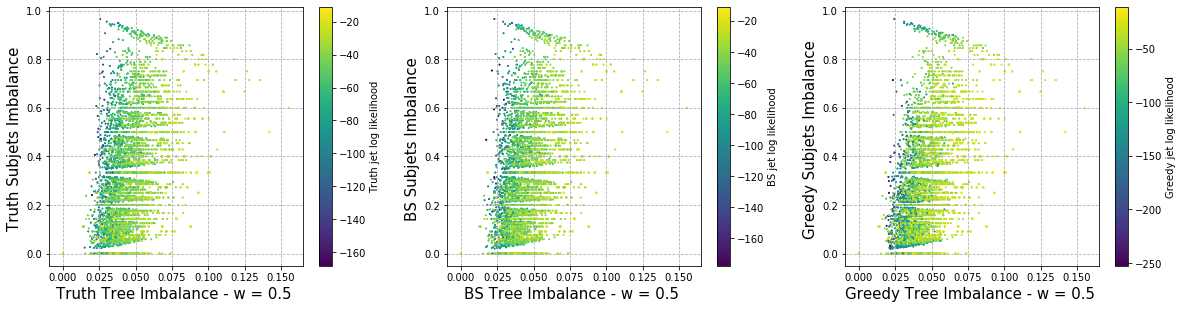

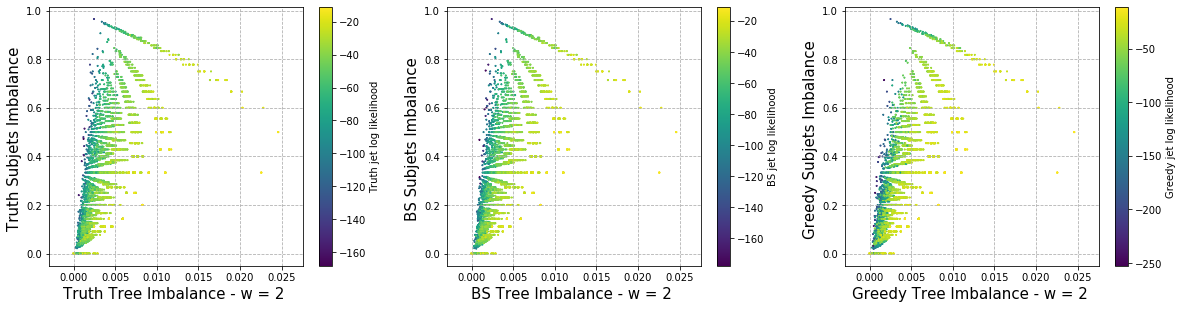

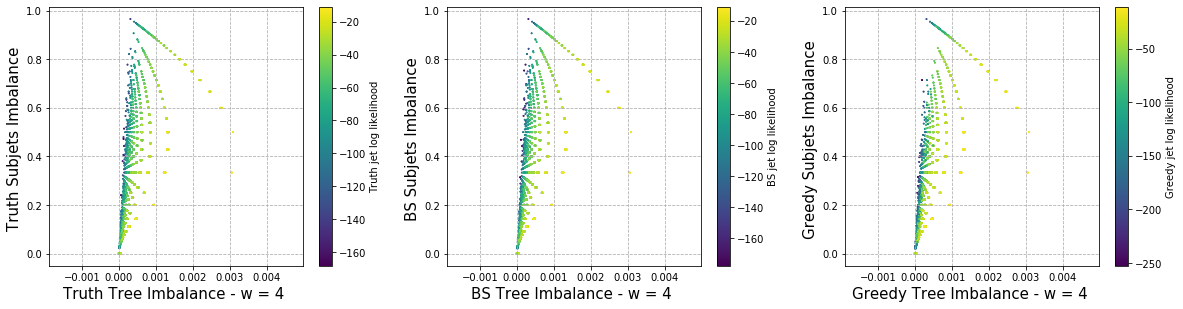

In [569]:
for weight in [0,0.5,2,4]:
    truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)
    Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)
    BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)

    
    nameX ="Tree Imbalance - w = %s"%str(weight)
    nameY = "Subjets Imbalance"
    title = ""
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"


    fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(16, 4)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

    cl1 = ax1.scatter(truth_dic["treesImb"], truth_dic["subjetsImb"], c=truth_dic["jetsListLogLH"], marker="X", s=markersize)
    cl2 = ax2.scatter(BSO_dic["treesImb"], BSO_dic["subjetsImb"], c=BSO_dic["jetsListLogLH"], marker="X", s=markersize)
    cl3 = ax3.scatter(Greedy_dic["treesImb"], Greedy_dic["subjetsImb"], c=Greedy_dic["jetsListLogLH"], marker="X", s=markersize)

    
    fig2.colorbar(cl1, ax=ax1, label="Truth jet log likelihood")
    fig2.colorbar(cl2, ax=ax2, label="BS jet log likelihood")
    fig2.colorbar(cl3, ax=ax3, label="Greedy jet log likelihood")
    
    
#     ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"Truth %s "%nameX, fontsize=15)
    ax1.set_ylabel(r"Truth %s "%nameY, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

#     ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"BS %s "%nameX, fontsize=15)
    ax2.set_ylabel(r"BS %s "%nameY, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

#     ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"Greedy %s "%nameX, fontsize=15)
    ax3.set_ylabel(r"Greedy %s "%nameY, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')




    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    plt.title(r"%s"%title, fontsize=20)
    
plt.show()

We show the tree vs subjets imbalance for different values of the weight $w$:
- We define the imbalance of the branches of a node splitting as  Imb $= abs(N_L - N_R)/(N_L + N_R)$, with $N_{L/R}$ the number of constituents in each branch.
- We define the tree imbalance as $\text{Tree}_{\text{Imb}} = 1/N_{\text{inner}} \sum_i $ Exp$(- w N_L)$ $\text{Imb}_i$, where $i$ labels the inner nodes, $N_{\text{inner}}$ is the number of inner nodes of the tree, $N_L$ is the level (starting at 1 for the root splitting) and $w$ is an input weight.

From the scan on $w$, we can see that the greater the log likelihood of a jet, the more important is the contribution of the subjets to the tree imbalance.
Also, BS jets approximate the truth jets better than the Greedy ones.

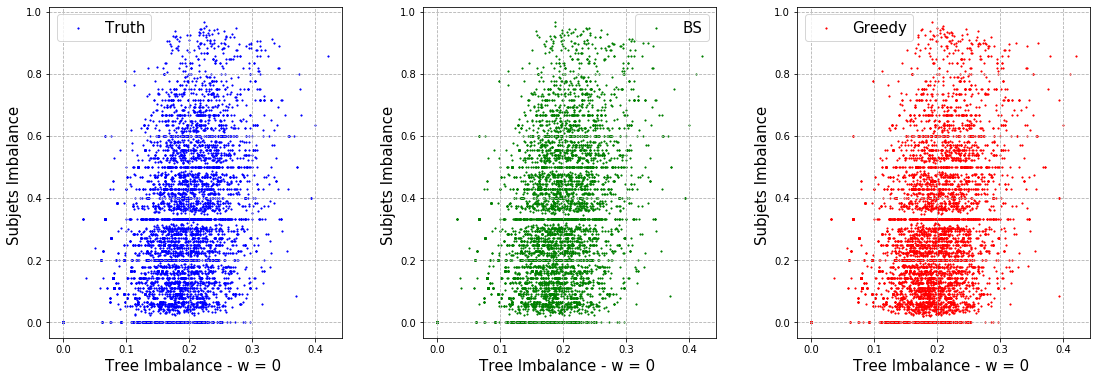

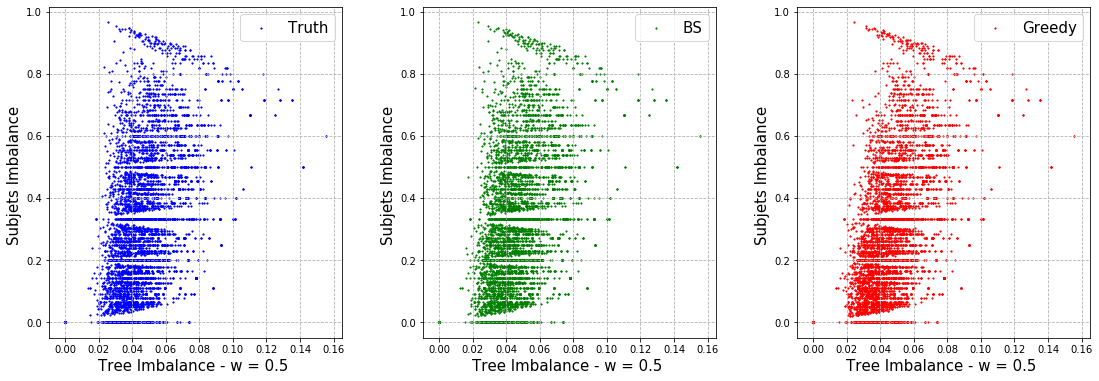

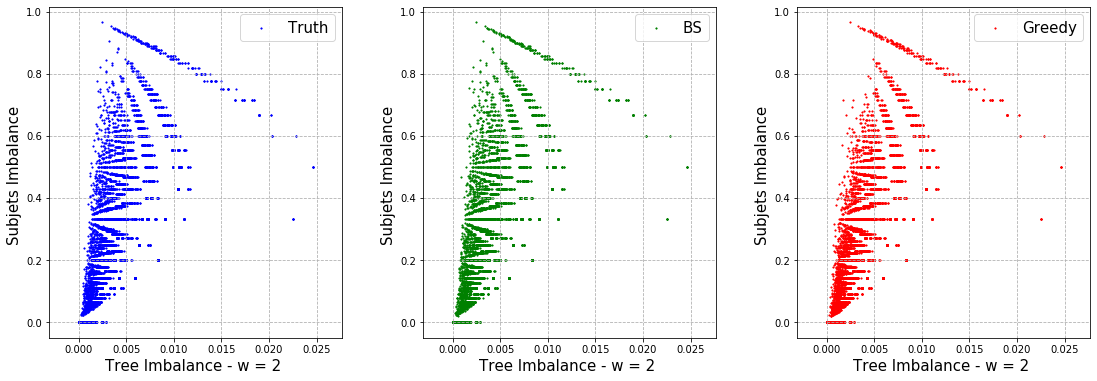

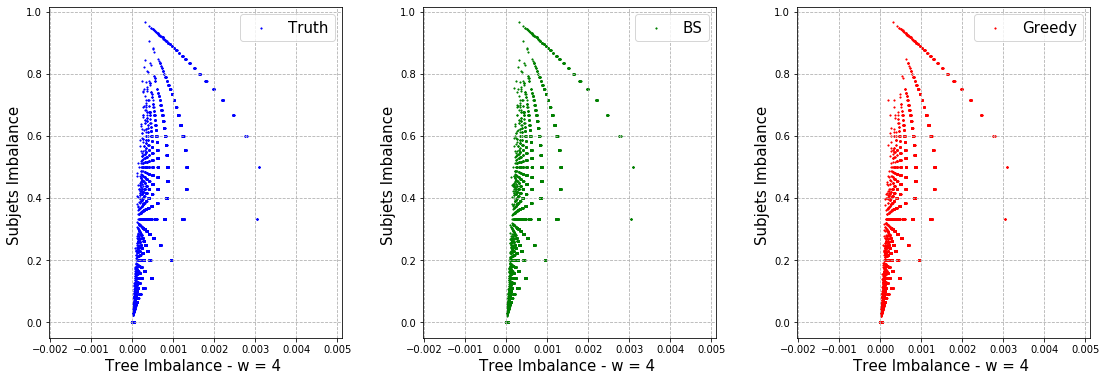

In [388]:
for weight in [0,0.5,2,4]:
    truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)
    Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)
    BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)

    nameY = "Subjets Imbalance"
    nameX ="Tree Imbalance - w = %s"%str(weight)
    title = ""
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"


    fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(15, 5)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

    ax1.scatter(truth_dic["treesImb"], truth_dic["subjetsImb"], color="blue", marker="X", s=markersize, label=LabelJetdijs)
    ax2.scatter(BSO_dic["treesImb"], BSO_dic["subjetsImb"], color="green", marker="X", s=markersize, label=LabelJetdijs2)
    ax3.scatter(Greedy_dic["treesImb"], Greedy_dic["subjetsImb"], color="red", marker="X", s=markersize, label=LabelJetdijs3)

    ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"%s "%nameX, fontsize=15)
    ax1.set_ylabel(r"%s "%nameY, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

    ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"%s "%nameX, fontsize=15)
    ax2.set_ylabel(r"%s "%nameY, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

    ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"%s "%nameX, fontsize=15)
    ax3.set_ylabel(r"%s "%nameY, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')




    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    plt.title(r"%s"%title, fontsize=20)
    
plt.show()

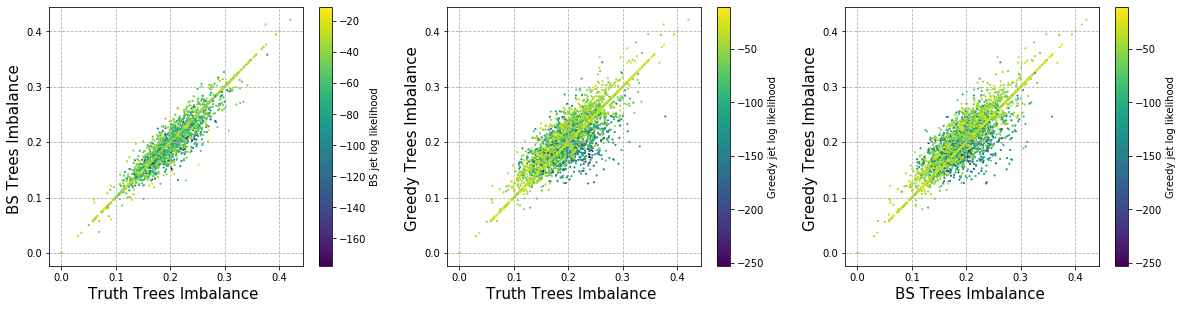

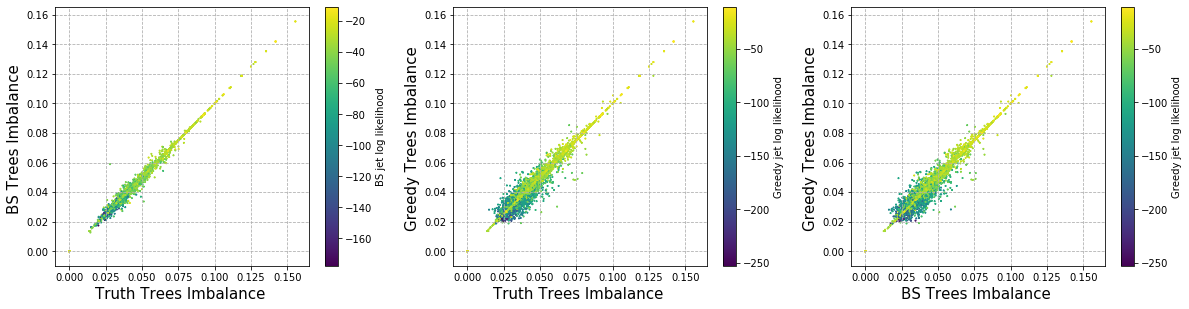

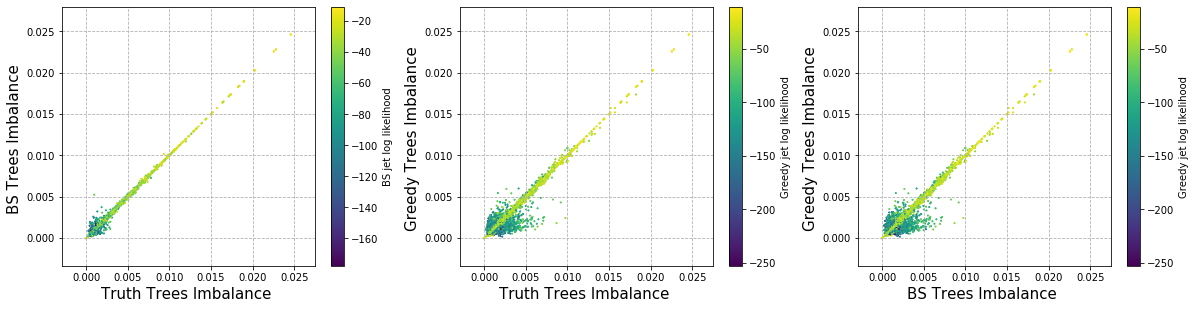

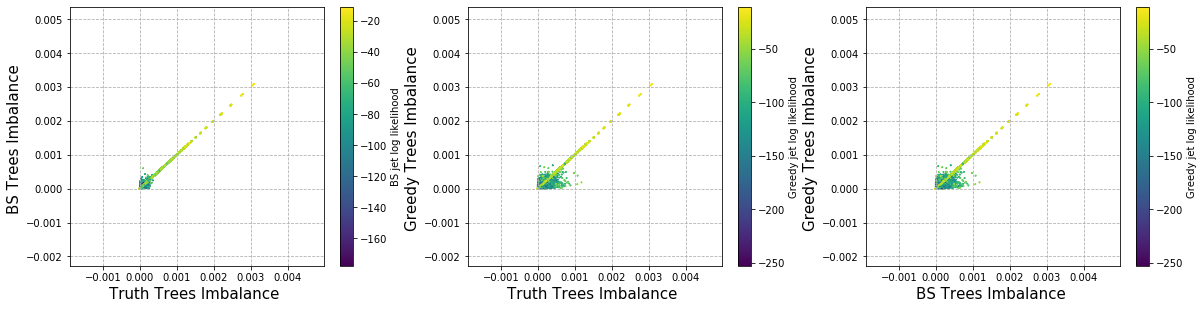

In [568]:
for weight in [0,0.5,2,4]:
# for weight in [0]:
    
    truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)
    Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)
    BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)
    
    nameY = "Subjets Imbalance"
    nameX ="Trees Imbalance"
    title = ""
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"


    fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(16, 4)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

#     cl2 = ax2.scatter(truth_dic["treesImb"], BSO_dic["treesImb"], c = BSO_dic["jetsListLogLH"], marker="X", s=markersize, label=LabelJetdijs2)
    
#     cl1  = ax1.scatter(truth_dic["treesImb"], Greedy_dic["treesImb"], c = Greedy_dic["jetsListLogLH"], marker="X", s=markersize, label=LabelJetdijs3)

#     cl3 = ax3.scatter(BSO_dic["treesImb"], Greedy_dic["treesImb"], c =Greedy_dic["jetsListLogLH"] , marker="X", s=markersize, label=LabelJetdijs3)
    cl1 = ax1.scatter(truth_dic["treesImb"], BSO_dic["treesImb"], c = BSO_dic["jetsListLogLH"], marker="X", s=markersize)
    
    cl2  = ax2.scatter(truth_dic["treesImb"], Greedy_dic["treesImb"], c = Greedy_dic["jetsListLogLH"], marker="X", s=markersize)

    cl3 = ax3.scatter(BSO_dic["treesImb"], Greedy_dic["treesImb"], c =Greedy_dic["jetsListLogLH"] , marker="X", s=markersize)


    fig2.colorbar(cl1, ax=ax1, label="BS jet log likelihood")
    fig2.colorbar(cl2, ax=ax2, label="Greedy jet log likelihood")
    fig2.colorbar(cl3, ax=ax3, label="Greedy jet log likelihood")
    
#     ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"Truth %s "%nameX, fontsize=15)
    ax1.set_ylabel(r"BS %s "%nameX, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

#     ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"Truth %s "%nameX, fontsize=15)
    ax2.set_ylabel(r"Greedy %s "%nameX, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

#     ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"BS %s "%nameX, fontsize=15)
    ax3.set_ylabel(r"Greedy %s "%nameX, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')




    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    plt.title(r"%s"%title, fontsize=20)
plt.show()

We show the tree vs subjets imbalance for different values of the weight $w$:
- We define the imbalance of the branches of a node splitting as  Imb $= abs(N_L - N_R)/(N_L + N_R)$, with $N_{L/R}$ the number of constituents in each branch.
- We define the tree imbalance as $\text{Tree}_{\text{Imb}} = 1/N_{\text{inner}} \sum_i $ Exp$(- w N_L)$ $\text{Imb}_i$, where $i$ labels the inner nodes, $N_{\text{inner}}$ is the number of inner nodes of the tree, $N_L$ is the level (starting at 1 for the root splitting) and $w$ is an input weight.

From the scan on $w$, we can see that the greater the log likelihood of a jet, the more important is the contribution of the subjets to the tree imbalance.
Also, BS jets approximate the truth jets better than the Greedy ones.

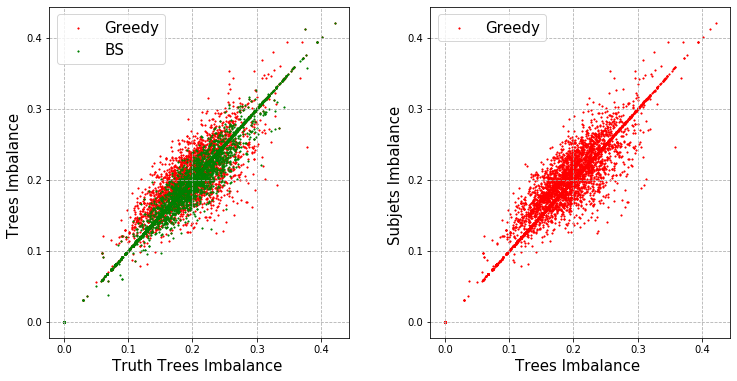

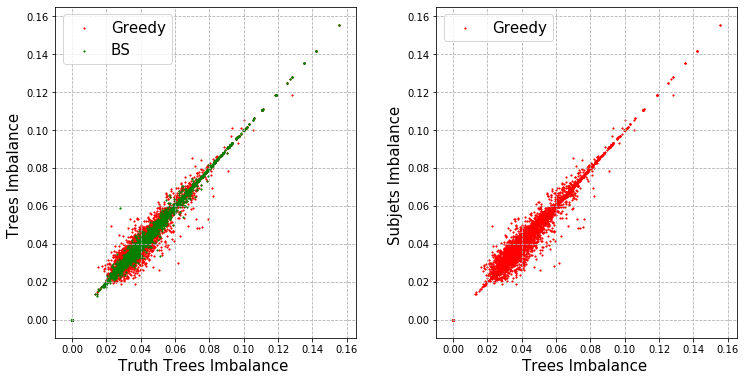

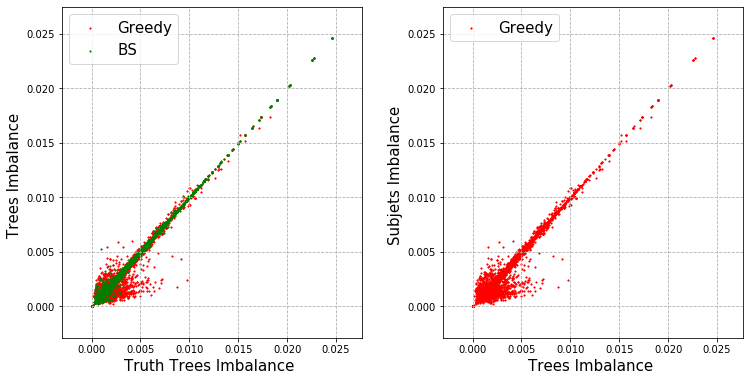

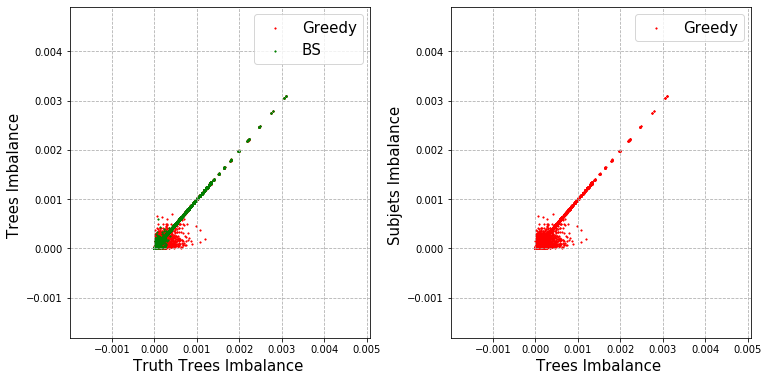

In [398]:
for weight in [0,0.5,2,4]:
    
    truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)
    Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)
    BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)
    
    nameY = "Subjets Imbalance"
    nameX ="Trees Imbalance"
    title = ""
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"


    fig2, (ax2,ax3) = plt.subplots(nrows=1, ncols=2)
    fig2.set_size_inches(10, 5)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1


    ax2.scatter(truth_dic["treesImb"], Greedy_dic["treesImb"], color="red", marker="X", s=markersize, label=LabelJetdijs3)
    ax2.scatter(truth_dic["treesImb"], BSO_dic["treesImb"], color="Green", marker="X", s=markersize, label=LabelJetdijs2)

    ax3.scatter(BSO_dic["treesImb"], Greedy_dic["treesImb"], color="red", marker="X", s=markersize, label=LabelJetdijs3)


    ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"Truth %s "%nameY, fontsize=15)
    ax1.set_ylabel(r"%s "%nameY, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

    ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"Truth %s "%nameX, fontsize=15)
    ax2.set_ylabel(r"%s "%nameX, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

    ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"%s "%nameX, fontsize=15)
    ax3.set_ylabel(r"%s "%nameY, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')




    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    plt.title(r"%s"%title, fontsize=20)
plt.show()

### Subjets Imbalance vs logLH

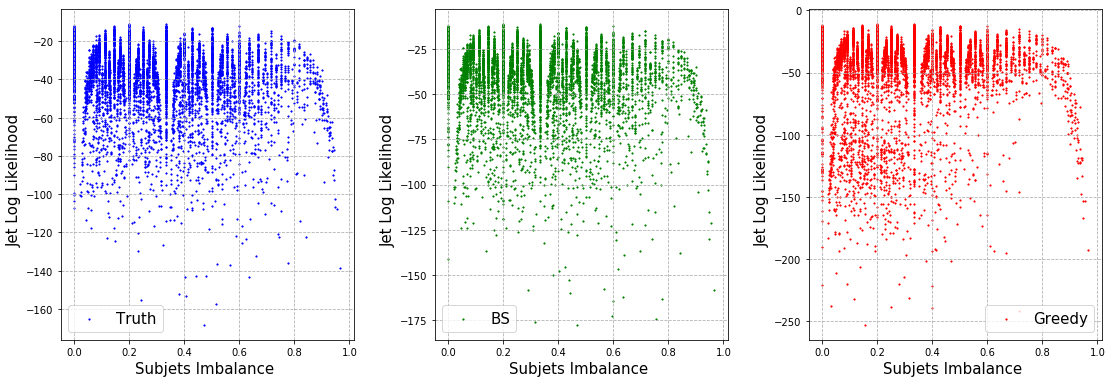

In [316]:
nameY = "Jet Log Likelihood "
nameX ="Subjets Imbalance"
title = ""
LabelJetdijs = "Truth"
LabelJetdijs2 = "BS"
LabelJetdijs3 = "Greedy"


fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig2.set_size_inches(15, 5)

plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
markersize = 1

ax1.scatter(truth_dic["subjetsImb"], truth_dic["jetsListLogLH"], color="blue", marker="X", s=markersize, label=LabelJetdijs)
ax2.scatter(BSO_dic["subjetsImb"], BSO_dic["jetsListLogLH"], color="green", marker="X", s=markersize, label=LabelJetdijs2)
ax3.scatter(Greedy_dic["subjetsImb"], Greedy_dic["jetsListLogLH"], color="red", marker="X", s=markersize, label=LabelJetdijs3)

ax1.legend(loc="best",  fontsize=15)
ax1.set_xlabel(r"%s "%nameX, fontsize=15)
ax1.set_ylabel(r"%s "%nameY, fontsize=15)
ax1.grid(which='both', axis='both', linestyle='--')

ax2.legend(loc="best",  fontsize=15)
ax2.set_xlabel(r"%s "%nameX, fontsize=15)
ax2.set_ylabel(r"%s "%nameY, fontsize=15)
ax2.grid(which='both', axis='both', linestyle='--')

ax3.legend(loc="best",  fontsize=15)
ax3.set_xlabel(r"%s "%nameX, fontsize=15)
ax3.set_ylabel(r"%s "%nameY, fontsize=15)
ax3.grid(which='both', axis='both', linestyle='--')




# plt.legend(loc='best', fontsize=15)
plt.grid(which='both', axis='both', linestyle='--')
plt.title(r"%s"%title, fontsize=20)
    
plt.show()

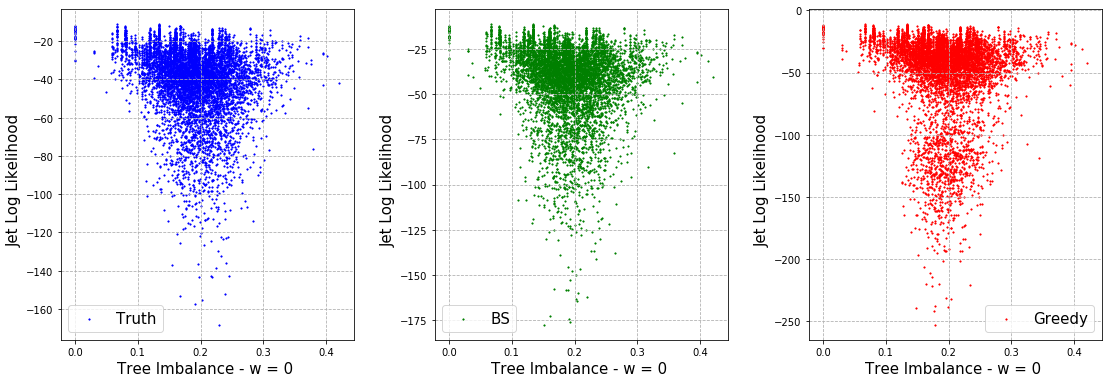

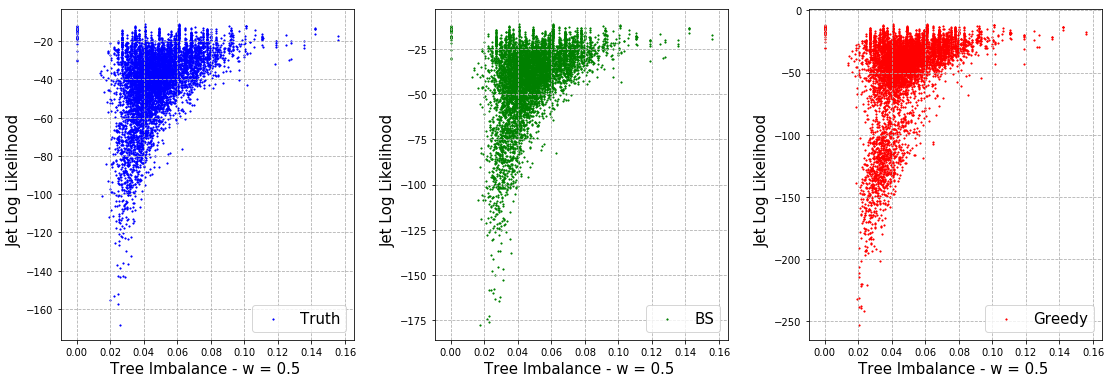

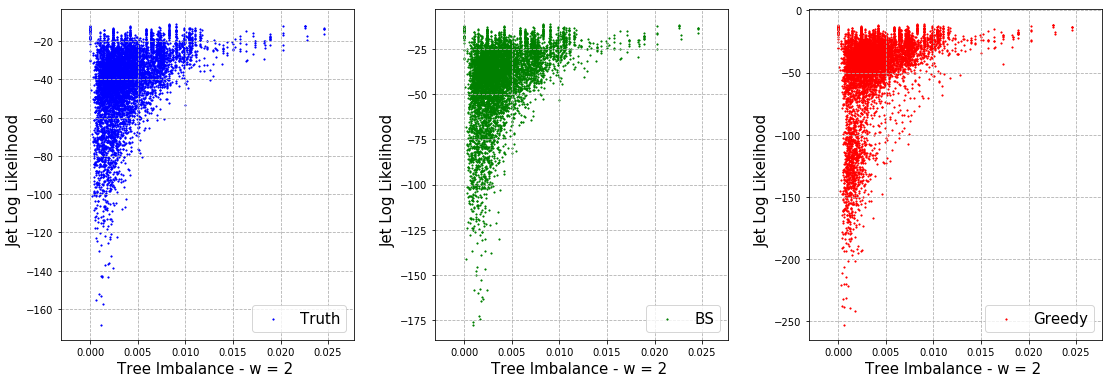

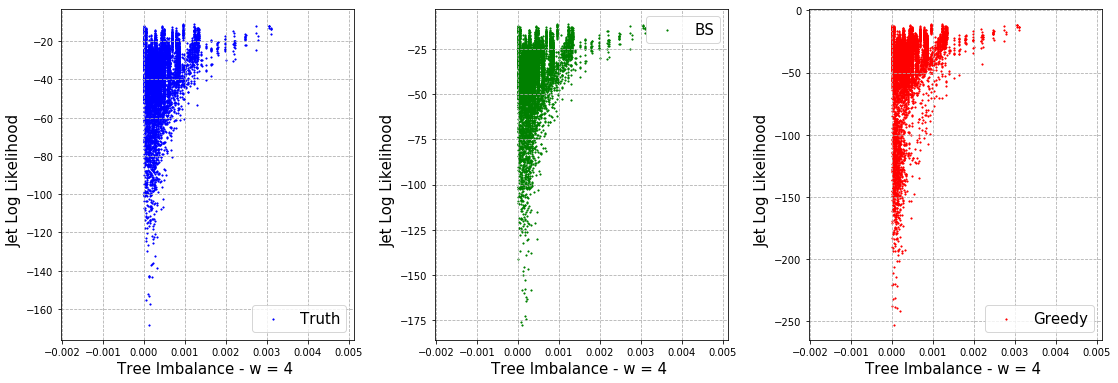

In [393]:
for weight in [0,0.5,2,4]:
    truth_dic = auxFunctions.scanTreeImbalance(truth_dic, weight, startLevel = 1)
    Greedy_dic = auxFunctions.scanTreeImbalance(Greedy_dic, weight, startLevel = 1)
    BSO_dic = auxFunctions.scanTreeImbalance(BSO_dic, weight, startLevel = 1)

    nameY = "Jet Log Likelihood "
    nameX ="Tree Imbalance - w = %s"%str(weight)
    title = ""
    LabelJetdijs = "Truth"
    LabelJetdijs2 = "BS"
    LabelJetdijs3 = "Greedy"


    fig2, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
    fig2.set_size_inches(15, 5)

    plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
    markersize = 1

    ax1.scatter(truth_dic["treesImb"], truth_dic["jetsListLogLH"], color="blue", marker="X", s=markersize, label=LabelJetdijs)
    ax2.scatter(BSO_dic["treesImb"], BSO_dic["jetsListLogLH"], color="green", marker="X", s=markersize, label=LabelJetdijs2)
    ax3.scatter(Greedy_dic["treesImb"], Greedy_dic["jetsListLogLH"], color="red", marker="X", s=markersize, label=LabelJetdijs3)

    ax1.legend(loc="best",  fontsize=15)
    ax1.set_xlabel(r"%s "%nameX, fontsize=15)
    ax1.set_ylabel(r"%s "%nameY, fontsize=15)
    ax1.grid(which='both', axis='both', linestyle='--')

    ax2.legend(loc="best",  fontsize=15)
    ax2.set_xlabel(r"%s "%nameX, fontsize=15)
    ax2.set_ylabel(r"%s "%nameY, fontsize=15)
    ax2.grid(which='both', axis='both', linestyle='--')

    ax3.legend(loc="best",  fontsize=15)
    ax3.set_xlabel(r"%s "%nameX, fontsize=15)
    ax3.set_ylabel(r"%s "%nameY, fontsize=15)
    ax3.grid(which='both', axis='both', linestyle='--')




    # plt.legend(loc='best', fontsize=15)
    plt.grid(which='both', axis='both', linestyle='--')
    plt.title(r"%s"%title, fontsize=20)
    
plt.show()

# Beam Search implementations: Beam Size Comparisons

In [164]:
importlib.reload(bs)
importlib.reload(BSO)

<module 'scripts.beamSearchOptimal' from '/home/sm4511/TreeAlgorithms/scripts/beamSearchOptimal.py'>

In [165]:
def truthLogLH(truth_jet,k=0):
    """ Truth jet log likelihood """
    
    likelihood.enrich_jet_logLH(truth_jet)
        
    LogLH = np.sum(truth_jet["logLH"]) 
    
    return LogLH

In [106]:
def reclustGreedyJet(truth_jet):
    """ Greedy jet reclustering """

    greedyJet = N2Greedy.recluster(
        truth_jet,
        delta_min =  truth_jet["pt_cut"] ,
        lam = float(truth_jet["Lambda"]),
        visualize = False,
    )
    
    GreedyLogLH = sum(greedyJet["logLH"])
    
    return greedyJet, GreedyLogLH

In [107]:
def beamSize_BSOList(truth_jet, beamsizeList, Nbest =1):
    """ Beam size scan for the Optimal Beam Search algorithm"""

    BSOtimeList=[]
    BSO_jets =[]

    for i in beamsizeList:  

            startTime= time.time()

            BSO_jets.append(
                BSO.recluster( 
                truth_jet, 
                beamSize = i,
                delta_min =  truth_jet["pt_cut"],
                lam = float(truth_jet["Lambda"]),
                N_best = Nbest,
            )[0]  
            )

            BSOtimeList.append(time.time() -startTime)
            
    BSO_jetsLogLH = [sum(jet["logLH"]) for jet in BSO_jets]
    
    return BSOtimeList, BSO_jets, BSO_jetsLogLH

### Beam size scan and plotting  functions

In [109]:
def BeamSizeLogLH(jetsName,  filename="", k=0):
    
    with open(input_dir+ str(jetsName) + '.pkl', "rb") as fd: 
        truth_jet = pickle.load(fd, encoding='latin-1')[int(k)]
    
    truthConst = N2Greedy.getConstituents(
    truth_jet,
	truth_jet["root_id"],
	[],
    )
    
    N = len(truthConst)
    
    likelihood.enrich_jet_logLH(truth_jet)
        
    truthLogLH = np.sum(truth_jet["logLH"]) 
    
    greedyJet, GreedyLogLH = reclustGreedyJet(truth_jet)

    
    beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)
#     beamsizeList = np.array(([1]))

    BSOtimeList, BSO_jets, BSO_jetsLogLH = beamSize_BSOList(truth_jet, beamsizeList )
    
    bstimeList, bs_jets, bs_jetsLogLH = beamSize_BSList(truth_jet, beamsizeList )
    
    with open("data/beamScanJets/jets"+str(filename)+".pkl", "wb") as f: 
        pickle.dump((
            truth_jet,
            truthLogLH, 
            greedyJet,
            GreedyLogLH, 
            BSOtimeList,
            BSO_jets,
            BSO_jetsLogLH, 
            bstimeList, 
            bs_jets,
            bs_jetsLogLH
        ), f) 
    
    return beamsizeList

In [110]:
def plotBeamSizeLogLH(beamsizeList = None, filename=""):

        with open("data/beamScanJets/jets"+str(filename)+".pkl", "rb") as fd:  
                truth_jet,\
                truthLogLH, \
                greedyJet,\
                GreedyLogLH,\
                BSOtimeList,\
                BSO_jets,\
                BSO_jetsLogLH, \
                bstimeList, \
                bs_jets,\
                bs_jetsLogLH = pickle.load(fd, encoding='latin-1')
                

        N = BSO_jets[0]["Nconst"]
        beamsizeList = np.minimum(np.concatenate(([1],np.arange(0.5,5.5,0.5)*N)),np.asarray(N*(N-1)/2 *np.ones(11))).astype(int)
                
        truthConst = N2Greedy.getConstituents(
        truth_jet,
        truth_jet["root_id"],
        [],
        )
    
        N = len(truthConst)
        
        print("Number of leaves = ",N)

        fig2, (ax1)= plt.subplots(nrows=1, ncols=1)
        fig2.set_size_inches(16,8)
        plt.tight_layout(pad=0.4, w_pad=5, h_pad=1.0)
        markersize = 100
        ax1.scatter(beamsizeList/N , BSO_jetsLogLH, color='blue', marker="s", s=markersize, label = "bs Optimal")
        ax1.scatter(beamsizeList/N , bs_jetsLogLH, color="red", marker ="o", s=markersize, label = "bs")
        ax1.scatter(1/N, GreedyLogLH, color="Green", marker = "X", s=markersize, label = "Greedy")
        ax1.scatter(1/N, truthLogLH, color="black", marker = "d", s=markersize, label = "Truth")
        ax1.grid(which='both',axis='both',linestyle='--')
        ax1.set_xlabel(r"(Beam Size)/(# leaves)", fontsize=15)
        ax1.set_ylabel("Jet log likelihood", fontsize=15)
        plt.title('Beam Size search', fontsize = 25)
        plt.legend(loc='best', fontsize=15)
        plt.grid(which='both',axis='both',linestyle='--')

### Log likelihoood vs beam size plots 

In [114]:
"""Data dir"""
input_dir= 'data/old/'
jets = "tree_100_truth"

with open(input_dir+ str(jets) + '.pkl', "rb") as fd: 
    truth_jets = pickle.load(fd, encoding='latin-1')

In [115]:
"""Number of jet constituents"""
Nconst100 = []
for jet in truth_jets:
    Nconst100.append(len(jet["leaves"]))
    
NconstAvg100 =np.average(Nconst100)
display(NconstAvg100)

36.82

In [117]:
""" Find jet location in list for a specific number of leaves"""
for i,N in enumerate(Nconst100):
    if 12>N>9:
        print("Jet #",i,"N const = ",N )

Jet # 72 N const =  11


In [118]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_72",k=72)
print("Total time = ",time.time() - startTime)

Total time =  2.057978868484497


Number of leaves =  11


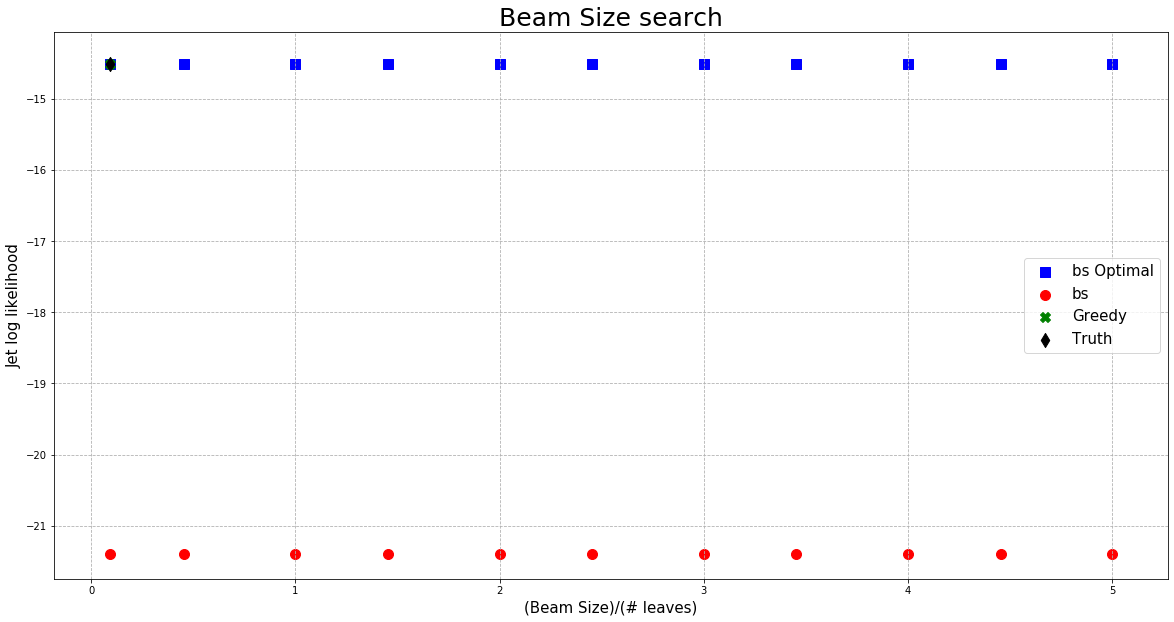

In [119]:
plotBeamSizeLogLH( filename="100_72")

In [120]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_34",k=34)
print("Total time = ",time.time() - startTime)

Total time =  20.85628390312195


Number of leaves =  22


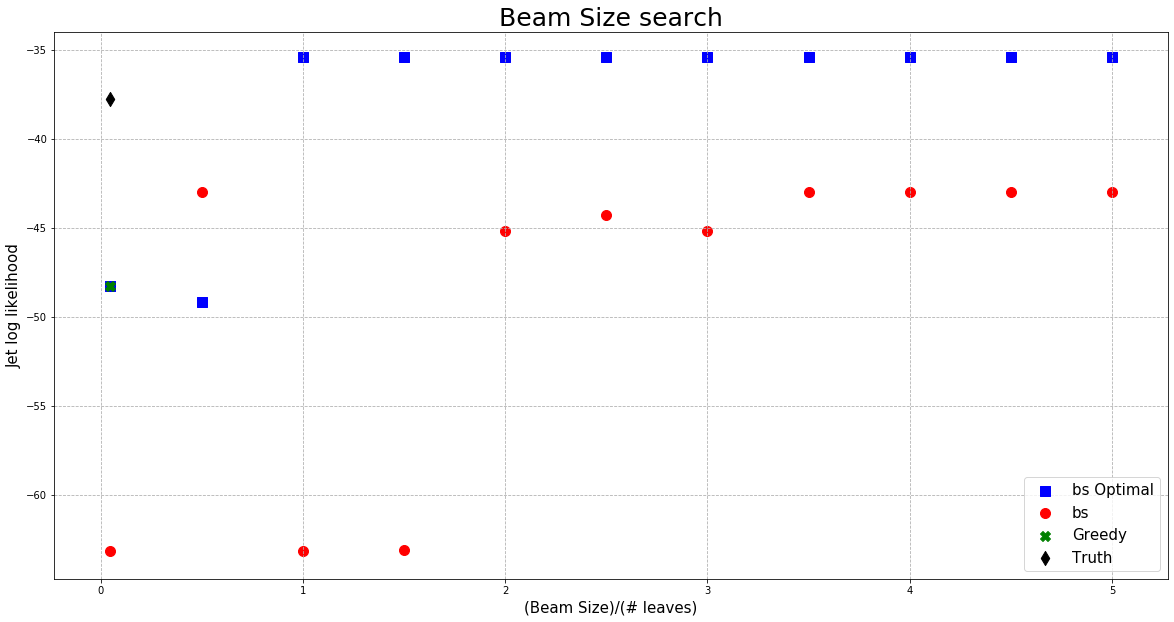

In [121]:
plotBeamSizeLogLH( filename="100_34")

In [122]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_70",k=70)
print("Total time = ",time.time() - startTime)

Total time =  346.0549330711365


Number of leaves =  50


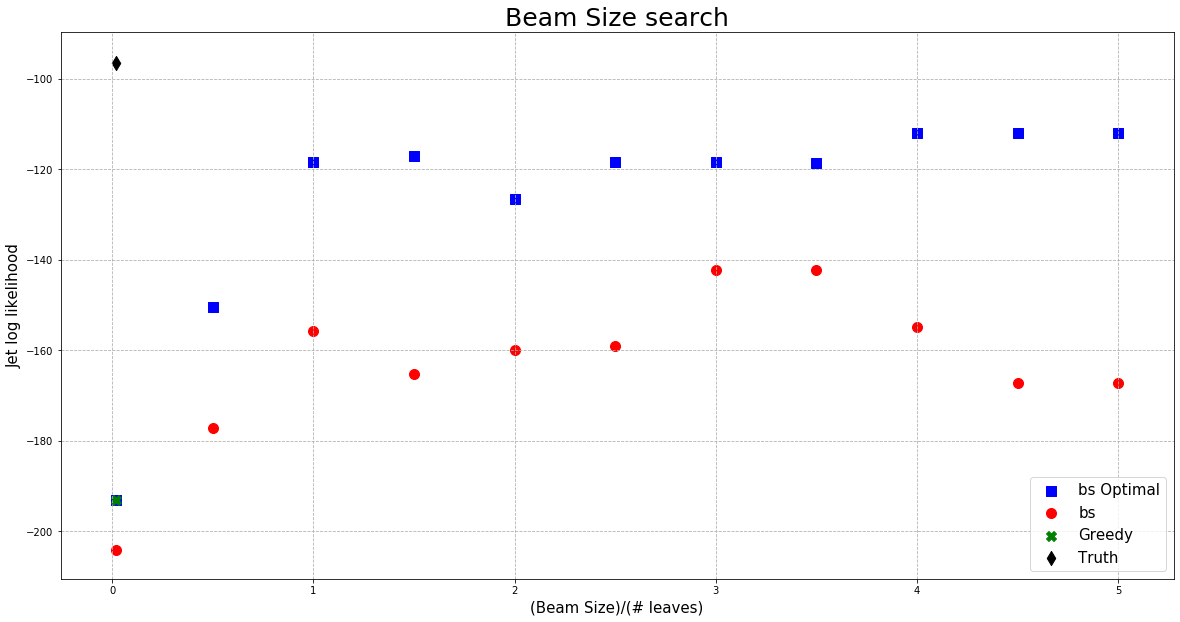

In [123]:
plotBeamSizeLogLH( filename="100_70")

In [124]:
startTime = time.time()
beamsizeList = BeamSizeLogLH("tree_100_truth", filename="100_62",k=62)
print("Total time = ",time.time() - startTime)

Total time =  4663.079787015915


Number of leaves =  98


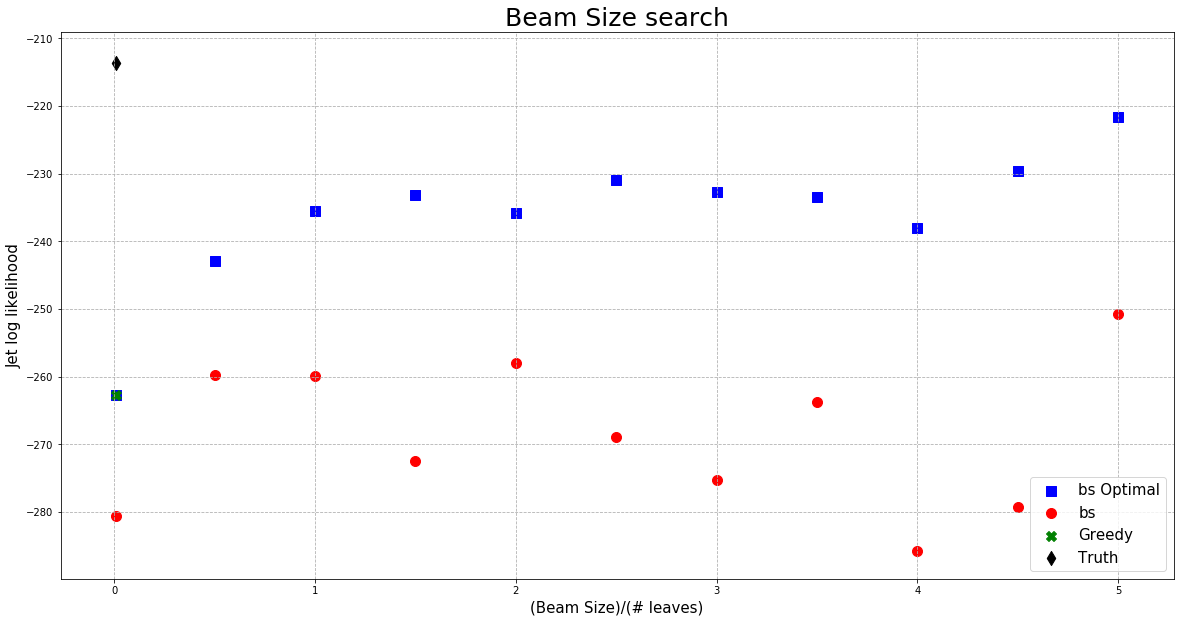

In [125]:
plotBeamSizeLogLH( filename="100_62")

## TESTS AND CODE COMPARISONS

In [151]:
def getLastSplittingProb(inputJet, node_id):
    """
    Recursive function to get a list of the tree leaves
    """
    jet = copy.deepcopy(inputJet)

    probList=[]

    left_node_id = jet["tree"][node_id,0]
    right_node_id = jet["tree"][node_id,1]
    
    if jet["tree"][left_node_id,0] == -1 and jet["tree"][right_node_id,0] == -1:
        
        probList.append(jet["logLH"][node_id - 97])
    
#     elif jet["tree"][node_id, 0] == -1:

# 		continue

    elif jet["tree"][node_id, 0] != -1:
        getLastSplittingProb(
        jet,
        jet["tree"][node_id, 0],
        )

        getLastSplittingProb(
        jet,
        jet["tree"][node_id, 1],
        )

    return probList

In [152]:
BSO_jetLastSplittingProb = getLastSplittingProb(BSO_jets[0], BSO_jets[0]["root_id"])

In [154]:
BSO_jetLastSplittingProb

[]

In [153]:
sum(BSO_jetLastSplittingProb)

0

In [32]:
# BSO_jets[0]

In [147]:
len(BSO_jets[0]["logLH"])

97

In [148]:
97+98

195

In [115]:
# BSO_jet

In [243]:
test =  bs.recluster( 
            truth_jet, 
            beamSize = 10,
            delta_min =  truth_jet["pt_cut"],
            lam = float(truth_jet["Lambda"]),
            N_best = 1,
        )[-1]  

In [244]:
test =  BSO.recluster( 
            truth_jet, 
            beamSize = 10,
            delta_min =  truth_jet["pt_cut"],
            lam = float(truth_jet["Lambda"]),
            N_best = 1,
        )[-1]  

## Duccio's beam search

In [116]:
importlib.reload(beamsearchTJS)

<module 'scripts.beamsearchTJS' from '/Users/sebastian/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/beamsearchTJS.py'>

In [93]:
len(truthConst)

30

In [97]:
truthConst = N2Greedy.getConstituents(
    truth_jet,	
	truth_jet["root_id"],
	[],
)

In [98]:
truthConstTriple = np.concatenate((truthConst,np.array([[0.]]*len(truthConst))),axis=1)

In [127]:
beam_Size = 20

In [128]:
a = time.time()
djet_bs_beam1 = beamsearchTJS.build_beamsearch_tree_TJS(truthConstTriple, 1, truth_jet["pt_cut"], float(truth_jet["Lambda"]))
b = time.time()
display(b-a)

0.1830611228942871

In [129]:
a = time.time()
djet_bs = beamsearchTJS.build_beamsearch_tree_TJS(truthConstTriple, beam_Size, truth_jet["pt_cut"], float(truth_jet["Lambda"]))
b = time.time()
display(b-a)

34.568865060806274

In [130]:
a = time.time()
beamSearch_jets = bs.recluster( 
    truth_jet, 
    beamSize = beam_Size,
    delta_min =  truth_jet["pt_cut"],
    lam = float(truth_jet["Lambda"]),
    N_best = 1,
)
b = time.time()
display(b-a)

10.727005958557129

In [131]:
np.sum(djet_bs["logLH"])

-74.47946266489937

In [132]:
np.sum(beamSearch_jets[-1]["logLH"])

-74.47946197240074

In [133]:
34.57/10.72

3.2248134328358207

In [126]:
8.48/2.48

3.4193548387096775